In [2]:
import pandas as pd
import polars as pl
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from scipy.sparse import csr_matrix,csc_matrix
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder

In [3]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows',3000)
pd.set_option('display.max_columns',100)

In [6]:
ed_df = pd.read_csv("EventData.csv",names = ['device_id','gender','age','group_train','event_id','dttime','longitude','latitude'])

In [9]:
ed_df.head()

device_id gender  age group_train event_id               dttime  \
0 -7548291590301750000      M   33        M32+   914064  2016-05-02 00:27:06   
1 -7548291590301750000      M   33        M32+  2939192  2016-05-05 10:12:40   
2 -7548291590301750000      M   33        M32+  2935402  2016-05-04 08:47:19   
3 -7548291590301750000      M   33        M32+  2906259  2016-05-01 11:00:08   
4 -7548291590301750000      M   33        M32+  2904274  2016-05-01 10:15:23   

  longitude latitude  
0    116.79    33.98  
1    116.79    33.98  
2    116.79    33.98  
3    116.79    33.98  
4    116.79    33.98

In [7]:
ed_df.group_train.value_counts()

M32+      398019
M25-32    360500
F32+      169971
F25-32    140072
M0-24     138429
F0-24      59942
Name: group_train, dtype: int64

In [7]:
ne_df = pd.read_csv("NonEventData.csv",names = ['device_id','gender','age','group_train','phone_brand','device_model'])

In [11]:
ne_df.head()

device_id gender  age group_train phone_brand device_model
0 -7548291590301750000      M   33        M32+      Huawei     è£è€€3C
1  6943568600617760000      M   37        M32+      Xiaomi        xnote
2  5441349705980020000      M   40        M32+        OPPO          R7s
3 -5393876656119450000      M   33        M32+      Xiaomi         MI 4
4  4543988487649880000      M   53        M32+     samsung    Galaxy S4

In [11]:
ne_df.group_train.value_counts()

M25-32    19837
M32+      16284
M0-24     11783
F25-32    10716
F32+       9755
F0-24      6270
Name: group_train, dtype: int64

In [13]:
import polars as pl

In [ ]:
ad_df = pl.read_csv('AppData.csv', new_columns=['event_id','app_id', 'is_installed','is_active','label_id','category'])

In [8]:
ad_df = pd.read_csv('AppData.csv', nrows = 10000000, quoting=csv.QUOTE_NONE, encoding='utf-8',
                names=['event_id','app_id', 'is_installed','is_active','label_id','category'])

In [13]:
ad_df.head()

event_id               app_id  is_installed  is_active  label_id  \
0   2960967  8557198901083791098             1          1       548   
1   2960967  8557198901083791098             1          1       204   
2   2960967  8557198901083791098             1          1       172   
3   2960967  8557198901083791098             1          1       223   
4   2960967  8557198901083791098             1          1       206   

               category  
0          Industry tag  
1        sports and gym  
2                    IM  
3  convenience services  
4               Medical

In [332]:
ad_df.label_id.value_counts()

548     1148354
704      796596
549      645466
405      396877
713      388300
730      349596
756      287731
302      284383
251      240277
303      197450
1007     195038
775      179738
710      144705
783      139238
714      134789
786      125707
252      122361
721      120397
779      118688
172      115917
757      115878
959      107418
960      107418
782       96423
306       96229
263       94196
777       93620
128       92372
179       90854
787       89617
262       83504
761       70949
781       68418
564       62551
1008      62302
780       60262
1012      59778
773       58004
1003      57812
751       57787
759       56120
724       52471
691       52133
254       51405
1015      50015
758       47718
794       45537
562       45228
723       45057
752       41436
178       40422
720       39104
256       39098
1014      38859
407       35307
406       35307
253       32135
909       31425
932       29762
168       27970
705       27429
774       27375
948     

In [14]:
len(ad_df)

10000000

### Data cleansing for eventdata (ed_df) start

In [15]:
ed_df.isnull().sum()

device_id      0
gender         0
age            0
group_train    0
event_id       0
dttime         0
longitude      0
latitude       0
dtype: int64

In [16]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266933 entries, 0 to 1266932
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   device_id    1266933 non-null  int64 
 1   gender       1266933 non-null  object
 2   age          1266933 non-null  int64 
 3   group_train  1266933 non-null  object
 4   event_id     1266933 non-null  object
 5   dttime       1266933 non-null  object
 6   longitude    1266933 non-null  object
 7   latitude     1266933 non-null  object
dtypes: int64(2), object(6)
memory usage: 77.3+ MB


In [9]:
# Converting longitude to numeric
ed_df['longitude'] = pd.to_numeric(ed_df['longitude'], errors='coerce')

In [10]:
# Converting latitude to numeric
ed_df['latitude'] = pd.to_numeric(ed_df['latitude'], errors='coerce')

In [19]:
ed_df['longitude'].isnull().sum()/len(ed_df)

0.040519111902523657

In [20]:
ed_df['latitude'].isnull().sum()/len(ed_df)

0.040519111902523657

In [18]:
ed_df1 = ed_df.copy()
ne_df1 = ne_df.copy()

In [11]:
# removing rows where latitude is null. This step will remove all devices that don't have an associated event
ed_df = ed_df[~ed_df['latitude'].isnull()]
ed_df = ed_df[~ed_df['longitude'].isnull()]

In [ ]:
# list1 = ed_df.event_id.value_counts()
# dic1 = list1.to_dict()
# for x in dic1:
#     if dic1[x] > 1: 
#         print("I was here")
#         print(x)

In [28]:
ed_df['longitude'].isnull().sum()/len(ed_df)

0.0

In [29]:
ed_df['latitude'].isnull().sum()/len(ed_df)

0.0

In [24]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1251632
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   device_id    1215598 non-null  int64  
 1   gender       1215598 non-null  object 
 2   age          1215598 non-null  int64  
 3   group_train  1215598 non-null  object 
 4   event_id     1215598 non-null  object 
 5   dttime       1215598 non-null  object 
 6   longitude    1215598 non-null  float64
 7   latitude     1215598 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.5+ MB


In [12]:
# Converting event_id to numeric data type
ed_df['event_id']=ed_df['event_id'].astype('int')

In [31]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1251632
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   device_id    1215598 non-null  int64  
 1   gender       1215598 non-null  object 
 2   age          1215598 non-null  int64  
 3   group_train  1215598 non-null  object 
 4   event_id     1215598 non-null  int32  
 5   dttime       1215598 non-null  object 
 6   longitude    1215598 non-null  float64
 7   latitude     1215598 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 78.8+ MB


In [32]:
ed_df.describe()
# Note that the longitude and latitude have 0s

device_id        age   event_id  longitude   latitude
count              1215598.00 1215598.00 1215598.00 1215598.00 1215598.00
mean    -31140470623033024.00      33.50 1626674.82      78.39      21.83
std    5322379819772868608.00       9.75  939663.06      53.81      15.65
min   -9222956879900149760.00      11.00       1.00    -180.00     -33.80
25%   -4672947726845479936.00      27.00  812320.50       0.00       0.00
50%    -118846022751750000.00      31.00 1627310.00     112.75      28.57
75%    4631836606964119552.00      39.00 2440379.50     117.17      34.01
max    9220914901466449920.00      89.00 3252948.00     151.18      53.64

In [33]:
ed_df[ed_df['longitude']==0]['longitude'].value_counts()/len(ed_df)

0.00   0.29
Name: longitude, dtype: float64

In [34]:
sns.boxplot(ed_df['longitude'])

<AxesSubplot: xlabel='longitude'>

<AxesSubplot: xlabel='latitude'>

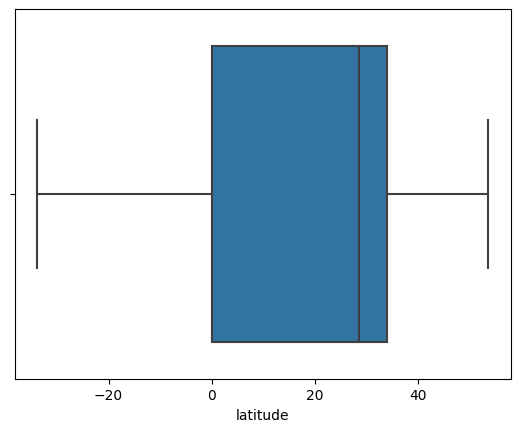

In [35]:
sns.boxplot(ed_df['latitude'])

In [37]:
len(ed_df[(ed_df['latitude']==0) & (ed_df['longitude']==0)])/len(ed_df)

0.2929891296300257

In [40]:
ed_df[(ed_df['latitude']==0) & (ed_df['longitude']==0)]

device_id gender  age group_train  event_id  \
292      6943568600617760000      M   37        M32+   1279824   
293      5441349705980020000      M   40        M32+   1814584   
294     -5393876656119450000      M   33        M32+   2124751   
295     -5393876656119450000      M   33        M32+   2791295   
296     -5393876656119450000      M   33        M32+    650136   
...                      ...    ...  ...         ...       ...   
1215593  4521177520949810000      F   26      F25-32    439941   
1215594  4521177520949810000      F   26      F25-32   2297790   
1251630  7532333004539760000      M   29      M25-32   1545030   
1251631  7532333004539760000      M   29      M25-32    511683   
1251632  7532333004539760000      M   29      M25-32   1725229   

                      dttime  longitude  latitude  
292      2016-05-01 11:59:32       0.00      0.00  
293      2016-05-02 23:55:47       0.00      0.00  
294      2016-05-06 23:06:44       0.00      0.00  
295      2016-05-06 22:55:28       0.00      0.00  
296      2016-05-06 23:01:47       0.00      0.00  
...                      ...        ...       ...  
1215593  2016-05-06 08:04:15       0.00      0.00  
1215594  2016-05-03 20:49:56       0.00      0.00  
1251630  2016-05-02 18:02:37       0.00      0.00  
1251631  2016-05-02 18:02:21       0.00      0.00  
1251632  2016-05-02 18:07:45       0.00      0.00  

[356157 rows x 8 columns]

#### Leaving the lat long 0s aside as we will separate them later into a different dataframe for clustering

In [31]:
# imputing the latitude and longitude with the mean of the values - revisit
#ed_df['latitude'] = ed_df.latitude.fillna(ed_df['latitude'].mean())
#ed_df['longitude'] = ed_df.longitude.fillna(ed_df['longitude'].mean())
# dflatitude = ed_df.groupby('device_id')['latitude'].value_counts().reset_index(name='counts')
# dflongitude = ed_df.groupby('device_id')['longitude'].value_counts().reset_index(name='counts')
ed_df['latitude'] = ed_df['latitude'].replace([0,-1],ed_df.latitude.median())
ed_df['longitude'] = ed_df['longitude'].replace([0,-1],ed_df.latitude.median())

In [32]:
ed_df['latitude'].describe()

count   1215305.00
mean         30.20
std           6.96
min         -33.80
25%          28.57
50%          28.57
75%          34.01
max          53.64
Name: latitude, dtype: float64

In [33]:
ed_df.longitude.describe()

count   1215305.00
mean         86.76
std          41.86
min        -180.00
25%          28.57
50%         112.75
75%         117.17
max         151.18
Name: longitude, dtype: float64

In [ ]:
#dflatitude.counts.apply(lambda x: x/)
#dfdflatitude.groupby('device_id').sum()['counts'].reset_index(name='counts')
# storing the total counts of 0 values for each device
# ed_df.groupby('device_id')[['latitude','longitude']].agg(lambda x: x.eq(0).sum()/x.count())

In [ ]:
#dflatcounts[dflatcounts.counts == 1]

In [ ]:
# list1 = ed_df.latitude.value_counts()
# dic1 = list1.to_dict()
# print(dic1)

In [34]:
ed_df[ed_df.device_id == -9220830859283100000]

device_id gender age group_train  event_id  \
632864  -9220830859283100000      M  19       M0-24   2091500   
632865  -9220830859283100000      M  19       M0-24   2864478   
632866  -9220830859283100000      M  19       M0-24    425650   
632867  -9220830859283100000      M  19       M0-24   2442700   
632868  -9220830859283100000      M  19       M0-24    881932   
632869  -9220830859283100000      M  19       M0-24   2220030   
632870  -9220830859283100000      M  19       M0-24    872437   
632871  -9220830859283100000      M  19       M0-24    727966   

                     dttime  longitude  latitude  
632864  2016-05-05 20:14:35      28.57     28.57  
632865  2016-05-03 21:48:41      28.57     28.57  
632866  2016-05-07 02:56:52      28.57     28.57  
632867  2016-05-07 02:59:40      28.57     28.57  
632868  2016-05-05 23:05:32      28.57     28.57  
632869  2016-05-05 20:16:10      28.57     28.57  
632870  2016-05-05 20:14:11      28.57     28.57  
632871  2016-05-05 23:16:35      28.57     28.57

In [ ]:
# len(dflatcounts[dflatcounts.counts == 1])/len(ed_df.device_id.unique())

In [ ]:
# dflatitude.head(10)

In [35]:
ed_df.isnull().sum()

device_id      0
gender         0
age            0
group_train    0
event_id       0
dttime         0
longitude      0
latitude       0
dtype: int64

In [36]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215305 entries, 4 to 1266638
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   device_id    1215305 non-null  object 
 1   gender       1215305 non-null  object 
 2   age          1215305 non-null  object 
 3   group_train  1215305 non-null  object 
 4   event_id     1215305 non-null  int32  
 5   dttime       1215305 non-null  object 
 6   longitude    1215305 non-null  float64
 7   latitude     1215305 non-null  float64
dtypes: float64(2), int32(1), object(5)
memory usage: 78.8+ MB


In [37]:
ed_df.gender.value_counts()

M    864013
F    351292
Name: gender, dtype: int64

In [38]:
ed_df['age'].describe()

count     1215305
unique        133
top            29
freq        73624
Name: age, dtype: int64

In [39]:
ed_df['dttime'].head()

4    2016-05-04 08:30:06
5    2016-05-07 09:08:07
6    2016-05-07 08:41:52
7    2016-05-07 09:30:27
8    2016-05-04 11:07:23
Name: dttime, dtype: object

### Data cleansing for eventdata (ed_df) end

### Data cleansing for noneventdata (ed_df) start

In [41]:
ne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74645 non-null  int64 
 1   gender        74645 non-null  object
 2   age           74645 non-null  int64 
 3   group_train   74645 non-null  object
 4   phone_brand   74645 non-null  object
 5   device_model  74645 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB


In [42]:
ne_df.isnull().sum()

device_id       0
gender          0
age             0
group_train     0
phone_brand     0
device_model    0
dtype: int64

In [43]:
ne_df.describe()

device_id      age
count                74645.00 74645.00
mean      -749135388419933.38    31.41
std    5327149733911385088.00     9.87
min   -9223067244542180352.00     1.00
25%   -4617366812584259584.00    25.00
50%     -18413620249632000.00    29.00
75%    4636655899093140480.00    36.00
max    9222849349208139776.00    96.00

In [44]:
ne_df.gender.value_counts()

M    47904
F    26741
Name: gender, dtype: int64

In [44]:
ne_df.phone_brand.value_counts()
# Although there is one record with no phone_brand, keeping this record as most likely will merge all these low values into other brand category

Xiaomi                      17337
samsung                     13706
Huawei                      13000
OPPO                         5802
vivo                         5658
Meizu                        4710
Coolpad                      3349
lenovo                       2695
Gionee                       1124
HTC                          1015
ZTE                           861
lshi                          760
Sony                          717
nubia                         484
LG                            333
ccmc                          275
TCL                           222
dowe                          213
hisense                       204
youmi                         192
hammer                        191
oneplus                       174
yuxin                         170
Ktouch                        159
Qiku                          140
moto                          103
CUBE                           67
koobee                         64
asus                           59
meitu         

In [45]:
ne_df.device_model.value_counts()

xnote                                  3016
MI 3                                   2304
MI 2S                                  2138
Galaxy Note 3                          2070
MI 4                                   1914
Galaxy Note 2                          1611
Galaxy S4                              1574
hu1                                    1242
è£è€€ç•…çŽ©4X                         1104
è£è€€3C                               1067
x11S                                    974
x1                                      970
Galaxy S3                               967
Mate 7                                  961
menote1                                 843
x12                                     826
xnote2                                  809
Galaxy S5                               727
menote1 2                               697
x12A                                    696
xnotea11                                688
MX3                                     678
hu1 Plus                        

### No data cleansing required for noneventdata(ne_df). Proceeding to the tasks

### Data cleansing for app data start

In [45]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   event_id      int64 
 1   app_id        int64 
 2   is_installed  int64 
 3   is_active     int64 
 4   label_id      int64 
 5   category      object
dtypes: int64(5), object(1)
memory usage: 457.8+ MB


In [47]:
ad_df.isnull().sum()

event_id        0
app_id          0
is_installed    0
is_active       0
label_id        0
category        0
dtype: int64

In [48]:
ad_df.is_installed.value_counts()

1    10000000
Name: is_installed, dtype: int64

In [49]:
ad_df.is_active.value_counts()

0    6812355
1    3187645
Name: is_active, dtype: int64

In [50]:
len(ad_df.category.unique())

439

In [51]:
len(ad_df.app_id.unique())

12881

In [52]:
len(ad_df.event_id.unique())

66791

# might need to delete is_installed based on the rest of the data

### 1. Plot appropriate graphs representing the distribution of age and gender in the data set [univariate]

#### Non-event Data set

#### Age graph

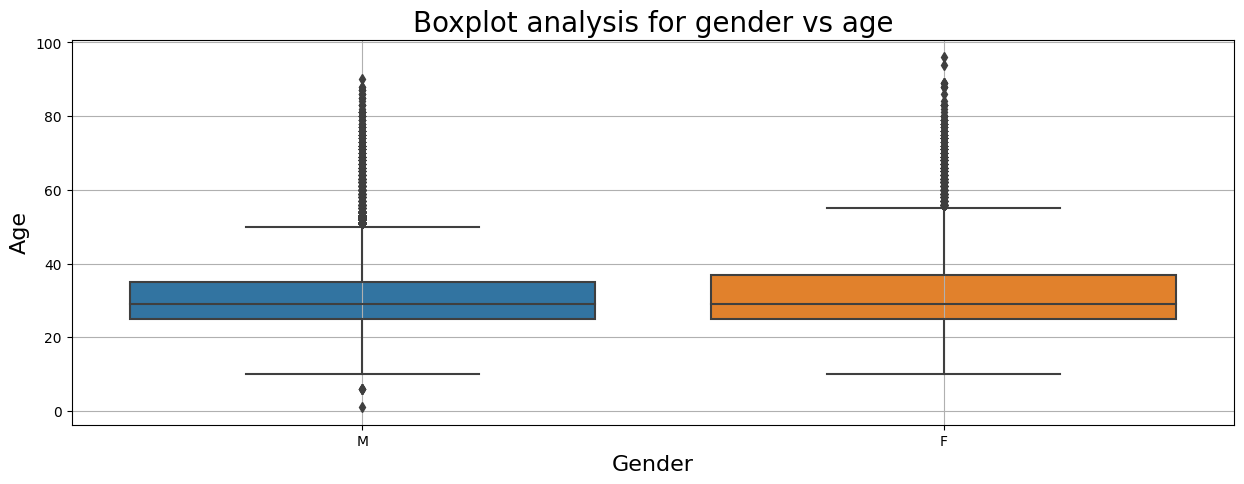

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(ne_df["gender"],ne_df["age"])
plt.grid()
plt.title("Boxplot analysis for gender vs age", fontsize=20)      
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.show()

In [54]:
ne_df.age.describe()

count   74645.00
mean       31.41
std         9.87
min         1.00
25%        25.00
50%        29.00
75%        36.00
max        96.00
Name: age, dtype: float64

In [57]:
# Checking for values less than 25

len(ne_df[ne_df.age < 18])

706

In [139]:
# Since the number of records that are less than 18 are very less, removing such records. It is very unlikely that age < 18 have their own sim cards

# ne_df = ne_df[ne_df.age>=18]

<AxesSubplot: xlabel='age'>

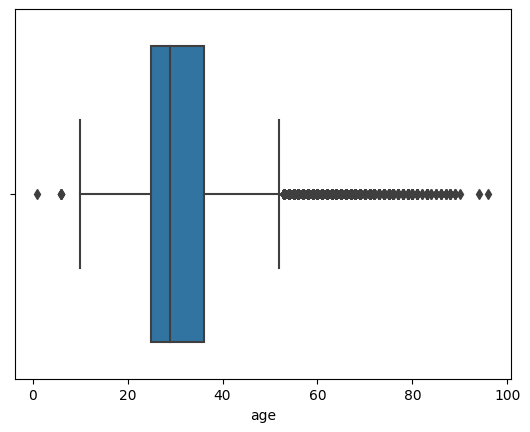

In [58]:
sns.boxplot(ne_df.age)

In [59]:
ne_df.age.describe()

count   74645.00
mean       31.41
std         9.87
min         1.00
25%        25.00
50%        29.00
75%        36.00
max        96.00
Name: age, dtype: float64

In [60]:
len(ne_df[ne_df.age >= 90])

3

In [135]:
# Removing records > 90
# ne_df = ne_df[ne_df.age<90]

<AxesSubplot: xlabel='age'>

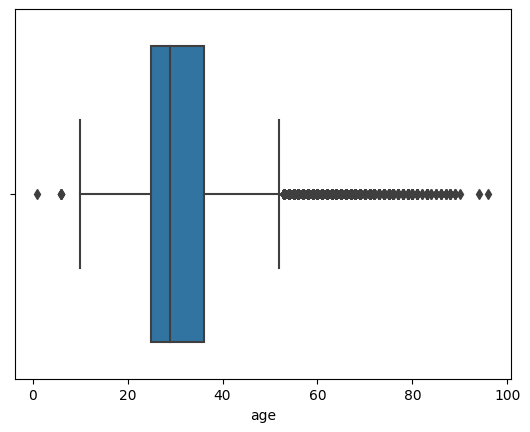

In [61]:
sns.boxplot(ne_df.age)

#### The graph looks continuous now for age so it's good

#### Gender graph

Text(0.5, 1.0, 'Counts of Gender categories')

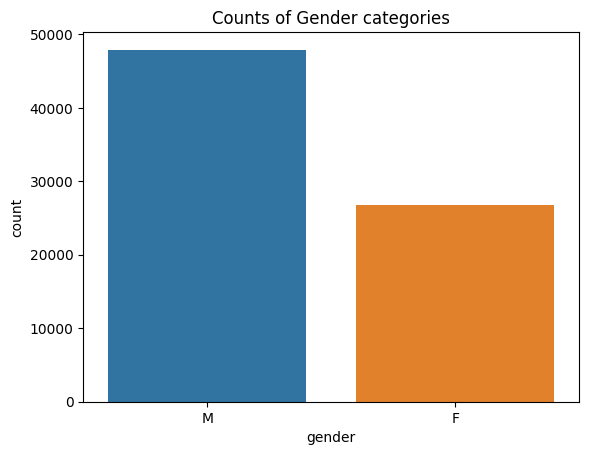

In [62]:
sns.countplot(ne_df["gender"])
plt.title("Counts of Gender categories")

In [63]:
len(ne_df[ne_df.gender == 'F'])/len(ne_df)

0.35824234710965236

#### Gender looks good. About 36 percent of the data is females and 64 is males

#### Event Dataset

<AxesSubplot: xlabel='age'>

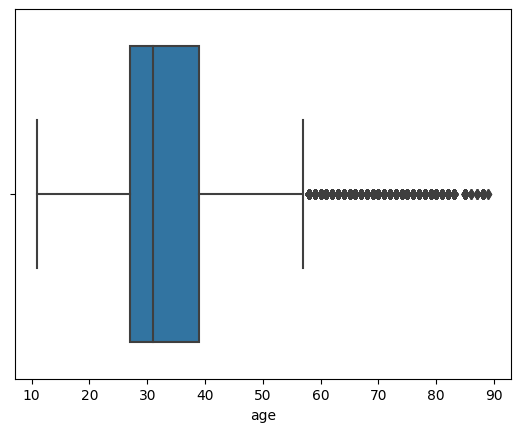

In [64]:
sns.boxplot(ed_df.age)

In [65]:
ed_df.age.describe()

count   1215598.00
mean         33.50
std           9.75
min          11.00
25%          27.00
50%          31.00
75%          39.00
max          89.00
Name: age, dtype: float64

In [66]:
len(ed_df[ed_df.age<18])

2918

#### Since the age distribution is constant and there are quite a few records that have age < 18, not deleting any records here

#### Gender distribution

Text(0.5, 1.0, 'Counts of Gender categories')

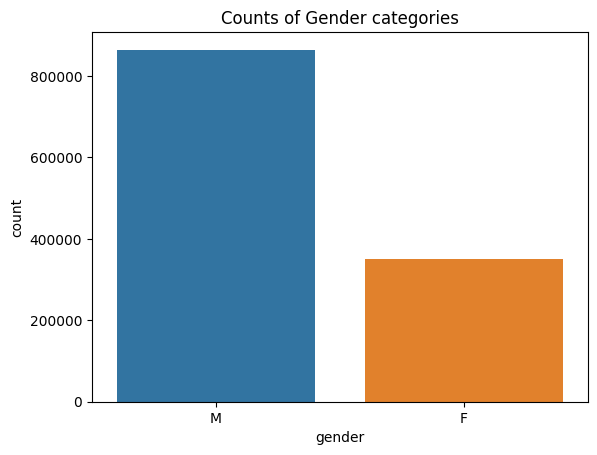

In [67]:
sns.countplot(ed_df["gender"])
plt.title("Counts of Gender categories")

In [68]:
len(ed_df[ed_df.gender == 'F'])/len(ed_df)

0.28898698418391605

### 2. Boxplot analysis for gender and age [bivariate]

#### Non-event dataset

<AxesSubplot: xlabel='gender', ylabel='age'>

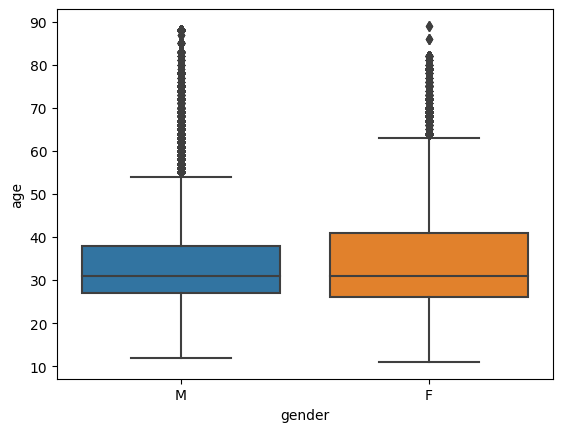

In [69]:
sns.boxplot(data=ed_df,x="gender",y="age")

#### The gender is almost equally distributed w.r.t. age, although the age band for the IQR for males is much shorter than the females. This tells us that a wider age of females have phones registered in their names.

#### Event dataset

<AxesSubplot: xlabel='gender', ylabel='age'>

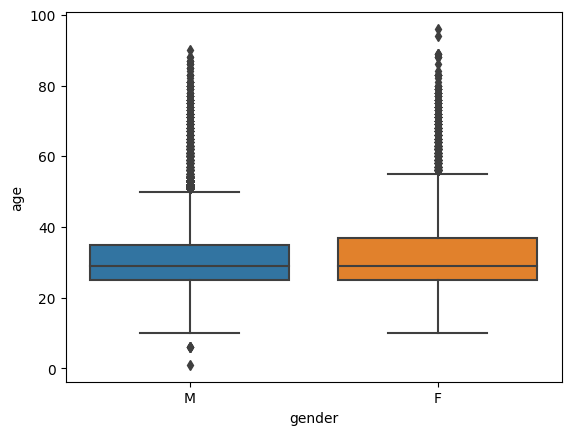

In [70]:
sns.boxplot(data=ne_df,x="gender",y="age")

#### The gender is almost equally distributed w.r.t. age, although the age band for the IQR for males is much shorter than the females. This tells us that a wider age of females have phones registered in their names.

### 3. Plot the percentage of the device_ids with and without event data

In [71]:
device_id_group_df = ed_df.groupby(['device_id']).sum()

In [72]:
device_id_group_df.head()

age   event_id  longitude  latitude
device_id                                                 
-9222956879900150000  2340   90491289    5888.48   1205.88
-9221026417907250000  4557  259780541   15095.83   4075.04
-9220830859283100000   152   12526693       0.00      0.00
-9220061629197650000  2080   80791266    4870.65   1818.14
-9218960997324660000   318    6354826       0.00      0.00

In [ ]:
# Creating a countplot for question 3
ax = sns.countplot(temp_non_event_df.to_pandas().has_event)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()))

plt.show()

In [13]:
#To plot the percentage of device ids with event data, we need to join the event and non-event datasets and subtract the distinct device ids in the combined dataset and subtract it from the non-event dataset
# Creating a new dataframe with distinct device ids in the event df
df_event_device = pd.DataFrame(ed_df.device_id.unique(),columns = ['device_id'])

In [14]:
#Adding a new column dev_ass_to_event that tells us if the device in non events table is associated to an event or not
ne_df['dev_ass_to_event'] = ne_df['device_id'].isin(df_event_device['device_id'])

In [15]:
ne_df['dev_ass_to_event'] = ne_df['dev_ass_to_event'].map({True:'device_with_event',False:'device_without_event'})

In [152]:
ne_df.head()

device_id gender  age group_train phone_brand device_model  \
1   5441349705980020000      M   40        M32+        OPPO          R7s   
2   3670076507269740000      M   33        M32+       Meizu    menote1 2   
3  -1243925047576100000      F   37        F32+      Xiaomi        xnote   
4   5263633571423510000      M   27      M25-32      Huawei     hu1 Plus   
5   4065408380331460000      M   20       M0-24      Xiaomi        xnote   

       dev_ass_to_event  
1  device_without_event  
2  device_without_event  
3     device_with_event  
4  device_without_event  
5  device_without_event

In [ ]:
# # Creating a countplot for question 3
# ax = sns.countplot(ne_df.dev_ass_to_event)

# for p in ax.patches:
#     ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()))

# plt.show()

In [53]:
event_df = pd.read_csv("EventData.csv")

In [54]:
event_df.head()

eventdata.device_id eventdata.gender  eventdata.age eventdata.group_id  \
0 -1000369272589010000                F             26             F25-32   
1 -1000572055892390000                F             27             F25-32   
2 -1000643208750510000                M             29             M25-32   
3 -1001337759327040000                M             30             M25-32   
4 -1001337759327040000                M             30             M25-32   

   eventdata.event_id eventdata.event_timestamp  eventdata.longitude  \
0                 NaN                       NaN                  NaN   
1                 NaN                       NaN                  NaN   
2                 NaN                       NaN                  NaN   
3          1083521.00       2016-05-04 08:30:06               120.19   
4          1992675.00       2016-05-07 09:08:07               119.50   

   eventdata.latitude  
0                 NaN  
1                 NaN  
2                 NaN  
3               30.20  
4               29.60

In [56]:
device_id_group_df = event_df.groupby(['eventdata.device_id']).sum()

In [57]:
device_id_group_df.head()

eventdata.age  eventdata.event_id  eventdata.longitude  \
eventdata.device_id                                                            
-9223067244542180000             24                0.00                 0.00   
-9222956879900150000           2340         90491289.00              5888.48   
-9222754701995930000             29                0.00                 0.00   
-9222352239947200000             23                0.00                 0.00   
-9222173362545970000             56                0.00                 0.00   

                      eventdata.latitude  
eventdata.device_id                       
-9223067244542180000                0.00  
-9222956879900150000             1205.88  
-9222754701995930000                0.00  
-9222352239947200000                0.00  
-9222173362545970000                0.00

In [59]:
device_id_group_df["isevent"] = device_id_group_df["eventdata.event_id"].apply(lambda x: 0 if x ==0 else 1)

In [60]:
device_id_group_df['isevent'].value_counts()

0    51335
1    23309
Name: isevent, dtype: int64

0    51335
1    23309
Name: isevent, dtype: int64


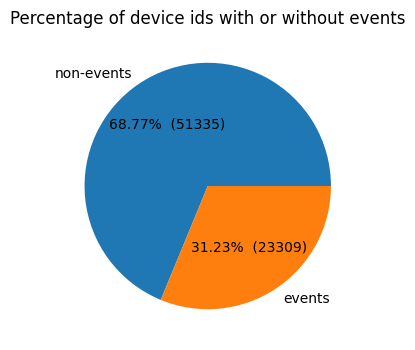

In [61]:
axis1 = plt.subplots(1,1,figsize=(15,9))
values=device_id_group_df['isevent'].value_counts()
print(values)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
# Using matplotlib pie chart and label the pie chart
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.pie(values,labels=['non-events','events'], autopct=make_autopct(values));
plt.title("Percentage of device ids with or without events")
plt.show()

#### The above graph is the answer for question 3

### 4. Plot a graph representing the distribution of events over different days of a week.

In [155]:
ed_df.head()

device_id gender  age group_train  event_id  \
0  -1001337759327040000      M   30      M25-32   1083521   
1  -1001337759327040000      M   30      M25-32   1992675   
2  -1001337759327040000      M   30      M25-32   1362390   
3  -1001337759327040000      M   30      M25-32   2039788   
4  -1001337759327040000      M   30      M25-32   1605658   

                dttime  longitude  latitude  device_avg_events  \
0  2016-05-04 08:30:06     120.19     30.20               0.00   
1  2016-05-07 09:08:07     119.50     29.60               0.00   
2  2016-05-07 08:41:52     119.62     29.71               0.00   
3  2016-05-07 09:30:27     119.56     29.64               0.00   
4  2016-05-04 11:07:23     120.29     30.42               0.00   

   lat_long_count  device_median_latitude  device_median_longitude  
0             109                   30.20                   120.11  
1             109                   30.20                   120.11  
2             109                   30.20                   120.11  
3             109                   30.20                   120.11  
4             109                   30.20                   120.11

In [62]:
ed_df.dttime = pd.to_datetime(ed_df.dttime)

In [63]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1251632
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   device_id    1215598 non-null  int64         
 1   gender       1215598 non-null  object        
 2   age          1215598 non-null  int64         
 3   group_train  1215598 non-null  object        
 4   event_id     1215598 non-null  int32         
 5   dttime       1215598 non-null  datetime64[ns]
 6   longitude    1215598 non-null  float64       
 7   latitude     1215598 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(2)
memory usage: 78.8+ MB


In [64]:
ed_df['date'] = ed_df.dttime.dt.date

In [65]:
ed_df['month'] = ed_df.dttime.dt.month

In [66]:
ed_df['month'].value_counts()

5    1215220
4        378
Name: month, dtype: int64

In [67]:
ed_df['day'] = ed_df.dttime.dt.day_name()

In [68]:
ed_df['hour'] = ed_df.dttime.dt.hour

In [69]:
ed_df.head()

device_id gender  age group_train  event_id              dttime  \
0 -7548291590301750000      M   33        M32+    914064 2016-05-02 00:27:06   
1 -7548291590301750000      M   33        M32+   2939192 2016-05-05 10:12:40   
2 -7548291590301750000      M   33        M32+   2935402 2016-05-04 08:47:19   
3 -7548291590301750000      M   33        M32+   2906259 2016-05-01 11:00:08   
4 -7548291590301750000      M   33        M32+   2904274 2016-05-01 10:15:23   

   longitude  latitude        date  month        day  hour  
0     116.79     33.98  2016-05-02      5     Monday     0  
1     116.79     33.98  2016-05-05      5   Thursday    10  
2     116.79     33.98  2016-05-04      5  Wednesday     8  
3     116.79     33.98  2016-05-01      5     Sunday    11  
4     116.79     33.98  2016-05-01      5     Sunday    10

<AxesSubplot: xlabel='day'>

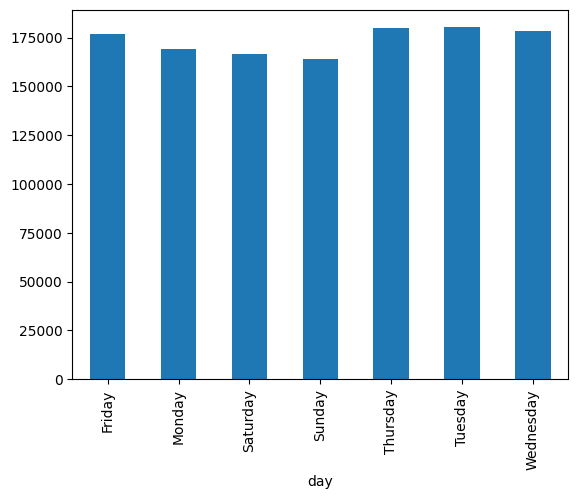

In [81]:
ed_df.groupby('day').count()['device_id'].plot(kind='bar')

#### It seems that most events are happening on Tuesday, Wednesday, and Thursday whereas the least events are happening on Sunday

#### 5. Plot a graph representing the distribution of events per hour [for one-week data]

In [70]:
ed_df.dttime

0         2016-05-02 00:27:06
1         2016-05-05 10:12:40
2         2016-05-04 08:47:19
3         2016-05-01 11:00:08
4         2016-05-01 10:15:23
                  ...        
1215593   2016-05-06 08:04:15
1215594   2016-05-03 20:49:56
1251630   2016-05-02 18:02:37
1251631   2016-05-02 18:02:21
1251632   2016-05-02 18:07:45
Name: dttime, Length: 1215598, dtype: datetime64[ns]

In [83]:
df_one_week_data = ed_df[(ed_df.dttime >= '2016-05-01') & (ed_df.dttime <='2016-05-08')]

In [84]:
df_one_week_data.head()

device_id gender  age group_train  event_id              dttime  \
0 -7548291590301750000      M   33        M32+    914064 2016-05-02 00:27:06   
1 -7548291590301750000      M   33        M32+   2939192 2016-05-05 10:12:40   
2 -7548291590301750000      M   33        M32+   2935402 2016-05-04 08:47:19   
3 -7548291590301750000      M   33        M32+   2906259 2016-05-01 11:00:08   
4 -7548291590301750000      M   33        M32+   2904274 2016-05-01 10:15:23   

   longitude  latitude        date        day  hour  month  
0     116.79     33.98  2016-05-02     Monday     0      5  
1     116.79     33.98  2016-05-05   Thursday    10      5  
2     116.79     33.98  2016-05-04  Wednesday     8      5  
3     116.79     33.98  2016-05-01     Sunday    11      5  
4     116.79     33.98  2016-05-01     Sunday    10      5

In [88]:
len(df_one_week_data)

1215219

In [89]:
len(ed_df)

1215598

#### Almost all events have happened in the first week of May 2016. Continuing to find the hourly events

<AxesSubplot: xlabel='hour'>

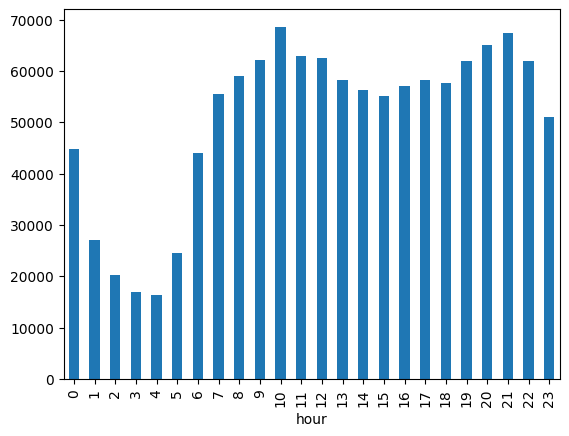

In [87]:
df_one_week_data.groupby('hour').count()['device_id'].plot(kind='bar')

#### The above graph shows that the maximum events occurred at 10 am in the morning and 9 pm in the event while the least events happened at 3 am and 4 am. Overall a lot of events happened at all times except between 1-5 am.

### 6.The difference in the distribution of events per hour for Male and Female consumers. [Show the difference using an appropriate chart for one-week data.]

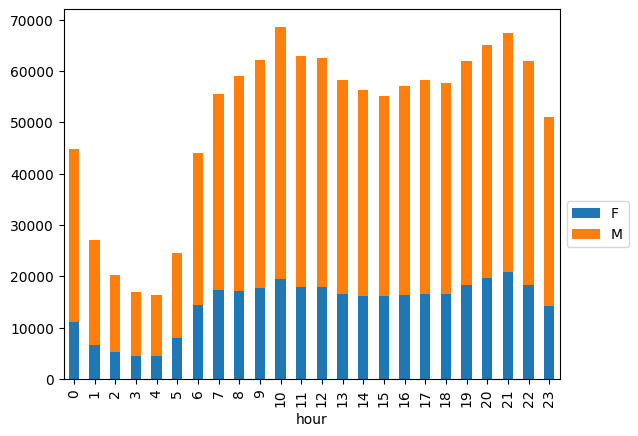

In [90]:
df_one_week_data.groupby('hour')['gender'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

In [91]:
df_one_week_data.group_train.value_counts()

M32+      387458
M25-32    346855
F32+      163373
F25-32    132494
M0-24     129694
F0-24      55345
Name: group_train, dtype: int64

#### Overall, men seem to be using phones more at late nights compared to women.

### 7.Is there any difference in the distribution of Events for different Age Groups over different days of the week? [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]

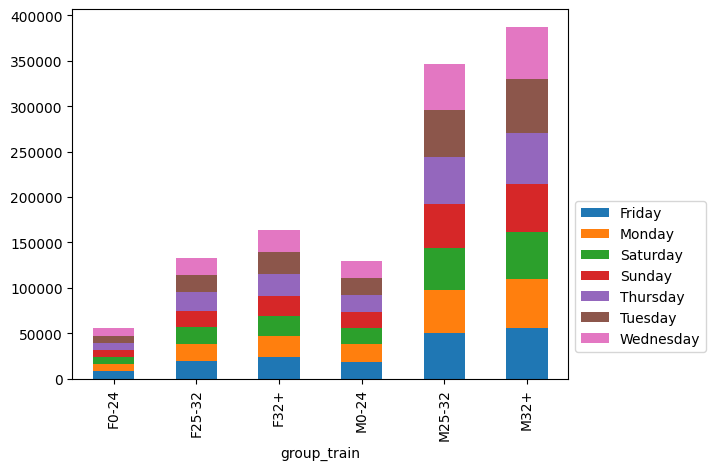

In [92]:
df_one_week_data.groupby('group_train')['day'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

#### From the above data we can only tell that Males overall access phones a lot compared to females. Both 32+ males and females access phones a lot on all days

### 8.Stacked bar chart for the top 10 mobile brands across male and female consumers.

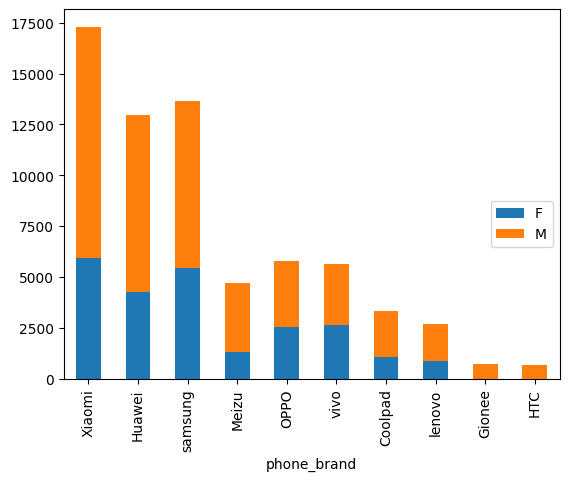

In [93]:
ne_df.groupby('phone_brand')['gender'].value_counts().sort_values(ascending = False).head(18).unstack().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

#### The above graph shows that overall there are more male customers than female in the top 10 brands

### 9. Prepare a chart representing the ten frequently used applications and their respective male and female percentage.

In [71]:
ead_df = ed_df.merge(ad_df, on='event_id')

In [95]:
ead_df.groupby('app_id')['gender'].value_counts().sort_values(ascending = False).head(11).unstack().plot(kind='bar',stacked=True)

<AxesSubplot: xlabel='app_id'>

#### The above graph tells us that barring the app with the highest users, the other top 10 apps are all mostly used by males

### 10. List the top 10 mobile phone brands bought by customers by age groups. [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]

In [183]:
ne_df.head()

device_id gender  age group_train phone_brand device_model  \
1   5441349705980020000      M   40        M32+        OPPO          R7s   
2   3670076507269740000      M   33        M32+       Meizu    menote1 2   
3  -1243925047576100000      F   37        F32+      Xiaomi        xnote   
4   5263633571423510000      M   27      M25-32      Huawei     hu1 Plus   
5   4065408380331460000      M   20       M0-24      Xiaomi        xnote   

       dev_ass_to_event  
1  device_without_event  
2  device_without_event  
3     device_with_event  
4  device_without_event  
5  device_without_event

In [72]:
# Creating an age_Cat column according to the needs of the question
ne_df["age_cat"] = pd.cut(ne_df.age,bins=[0,24,32,45,100],labels=["0-24","25-32","33-45","46+"])

In [97]:
ne_df.head(100)

device_id gender  age group_train phone_brand  \
0  -7548291590301750000      M   33        M32+      Huawei   
1   6943568600617760000      M   37        M32+      Xiaomi   
2   5441349705980020000      M   40        M32+        OPPO   
3  -5393876656119450000      M   33        M32+      Xiaomi   
4   4543988487649880000      M   53        M32+     samsung   
5  -1819925713085810000      F   23       F0-24        OPPO   
6   3670076507269740000      M   33        M32+       Meizu   
7   3585775875204580000      F   51        F32+      Xiaomi   
8   7442042493953950000      M   26      M25-32      Huawei   
9  -1243925047576100000      F   37        F32+      Xiaomi   
10  3828209440769570000      M   32      M25-32      lenovo   
11  5333872006968810000      M   34        M32+      Xiaomi   
12  -800490591774117000      F   33        F32+      Huawei   
13  4216041491117040000      M   60        M32+        lshi   
14 -5828470457669720000      F   38        F32+      Xiaomi   
15 -7430262216439700000      M   42        M32+      Huawei   
16  5263633571423510000      M   27      M25-32      Huawei   
17 -5552080107772750000      F   41        F32+      Huawei   
18 -3441149835823130000      M   30      M25-32      Huawei   
19 -6189495255928690000      M   37        M32+        OPPO   
20  4065408380331460000      M   20       M0-24      Xiaomi   
21 -8741652041341460000      M   52        M32+      Xiaomi   
22   600258969813393000      M   42        M32+       Meizu   
23  1528562242993160000      M   44        M32+      Gionee   
24  6021903247982800000      M   26      M25-32        OPPO   
25 -3700868433721280000      F   26      F25-32        OPPO   
26  4823428704448060000      M   47        M32+      Huawei   
27 -3606927452885540000      M   26      M25-32      Xiaomi   
28 -5395777262013020000      F   44        F32+        moto   
29   552267743101725000      F   28      F25-32       Meizu   
30  4383614216971680000      M   39        M32+     samsung   
31  7187262337663700000      M   20       M0-24      Xiaomi   
32   715426691810657000      M   29      M25-32       Meizu   
33  4794091972520650000      M   20       M0-24        OPPO   
34  8353740206445730000      M   23       M0-24       nubia   
35  -177922649506935000      M   39        M32+     samsung   
36 -6435361698485800000      M   46        M32+        Sony   
37  1604657008397660000      F   76        F32+      Huawei   
38   928593381271847000      M   42        M32+      Xiaomi   
39  2633631061299870000      M   21       M0-24      Xiaomi   
40 -6880965893023640000      M   45        M32+      Xiaomi   
41 -4856569735323850000      M   18       M0-24      Gionee   
42  4716070018261570000      M   32      M25-32      Xiaomi   
43  1779631023439400000      F   39        F32+      Huawei   
44  7959116654849360000      M   34        M32+        OPPO   
45 -2776892778424380000      F   20       F0-24      lenovo   
46 -2619271351772610000      M   30      M25-32      Xiaomi   
47 -3869719222309140000      M   29      M25-32       Meizu   
48  5503011144035420000      F   27      F25-32      Xiaomi   
49  4100499219285600000      M   29      M25-32         HTC   
50  3517190067519570000      F   43        F32+      Huawei   
51    76979125237484000      M   58        M32+      Xiaomi   
52  8455251085115450000      M   21       M0-24     samsung   
53  2660863774209960000      M   45        M32+      Xiaomi   
54 -5019317356982730000      M   34        M32+        OPPO   
55 -2701095115147560000      M   21       M0-24        vivo   
56  1718134838895710000      M   32      M25-32       Meizu   
57  3164462712781370000      M   33        M32+      Huawei   
58 -3669784774360180000      F   62        F32+      Xiaomi   
59  -500388403428121000      M   25      M25-32      Xiaomi   
60 -8726733746650240000      M   40        M32+      Huawei   
61  6854498090913260000      M   28      M25-32       Meizu   
62  1074260721091960000      M   33        M3

In [73]:
ne_df["age_cat"].value_counts()

25-32    30553
33-45    18911
0-24     18053
46+       7128
Name: age_cat, dtype: int64

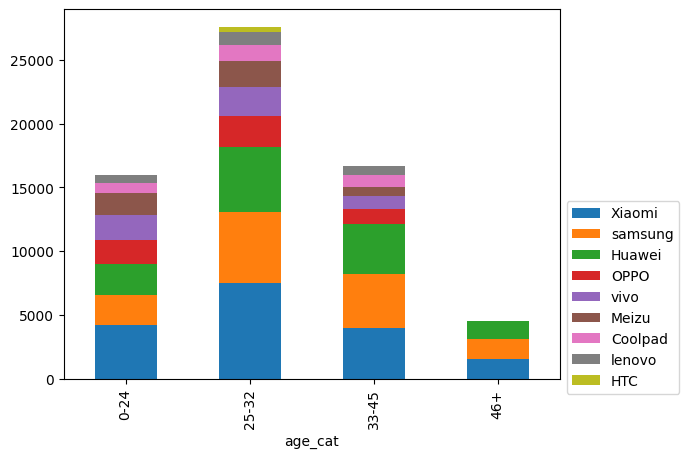

In [99]:
ne_df.groupby('age_cat')['phone_brand'].value_counts().sort_values(ascending = False).head(28).unstack().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

#### Overall the observation is that Xiaomi is the most preferred brand across all categories

### Feature Engineering

### Feature engineering on Events data

In [100]:
ed_df.describe()

device_id        age   event_id  longitude   latitude  \
count              1215598.00 1215598.00 1215598.00 1215598.00 1215598.00   
mean    -31140470623033024.00      33.50 1626674.82      78.39      21.83   
std    5322379819772868608.00       9.75  939663.06      53.81      15.65   
min   -9222956879900149760.00      11.00       1.00    -180.00     -33.80   
25%   -4672947726845479936.00      27.00  812320.50       0.00       0.00   
50%    -118846022751750000.00      31.00 1627310.00     112.75      28.57   
75%    4631836606964119552.00      39.00 2440379.50     117.17      34.01   
max    9220914901466449920.00      89.00 3252948.00     151.18      53.64   

            hour      month  
count 1215598.00 1215598.00  
mean       13.06       5.00  
std         6.36       0.02  
min         0.00       4.00  
25%         8.00       5.00  
50%        13.00       5.00  
75%        19.00       5.00  
max        23.00       5.00

In [101]:
# Checking if there are any duplicate events
len(ed_df.event_id.unique())/len(ed_df)
# No duplicate events

1.0

In [102]:
ed_df.head()

device_id gender  age group_train  event_id              dttime  \
0 -7548291590301750000      M   33        M32+    914064 2016-05-02 00:27:06   
1 -7548291590301750000      M   33        M32+   2939192 2016-05-05 10:12:40   
2 -7548291590301750000      M   33        M32+   2935402 2016-05-04 08:47:19   
3 -7548291590301750000      M   33        M32+   2906259 2016-05-01 11:00:08   
4 -7548291590301750000      M   33        M32+   2904274 2016-05-01 10:15:23   

   longitude  latitude        date        day  hour  month  
0     116.79     33.98  2016-05-02     Monday     0      5  
1     116.79     33.98  2016-05-05   Thursday    10      5  
2     116.79     33.98  2016-05-04  Wednesday     8      5  
3     116.79     33.98  2016-05-01     Sunday    11      5  
4     116.79     33.98  2016-05-01     Sunday    10      5

#### 1. Considering the events data, you can create a feature called Average Events

In [74]:
#ed_df['device_avg_events'] = ed_df.groupby('device_id')['event_id'].count()
device_count = len(ed_df.device_id.unique())
dfeventcount = ed_df.groupby('device_id')['event_id'].agg(lambda x: x.count()/device_count).reset_index()

In [75]:
dfeventcount.head()

device_id  event_id
0 -9222956879900150000      0.00
1 -9221026417907250000      0.01
2 -9220830859283100000      0.00
3 -9220061629197650000      0.00
4 -9218960997324660000      0.00

In [76]:
dfeventcount.rename(columns = {"event_id": "device_avg_events"},inplace=True)

In [77]:
ed_df = ed_df.merge(dfeventcount,on = "device_id")

In [109]:
ed_df[ed_df.device_id == -9221026417907250000]

device_id gender  age group_train  event_id  \
590193 -9221026417907250000      F   31      F25-32    935042   
590194 -9221026417907250000      F   31      F25-32   2934586   
590195 -9221026417907250000      F   31      F25-32   2905975   
590196 -9221026417907250000      F   31      F25-32   2854436   
590197 -9221026417907250000      F   31      F25-32   2854435   
590198 -9221026417907250000      F   31      F25-32   2771386   
590199 -9221026417907250000      F   31      F25-32   2771070   
590200 -9221026417907250000      F   31      F25-32   2761139   
590201 -9221026417907250000      F   31      F25-32   2742886   
590202 -9221026417907250000      F   31      F25-32   2739657   
590203 -9221026417907250000      F   31      F25-32   2734235   
590204 -9221026417907250000      F   31      F25-32   2718765   
590205 -9221026417907250000      F   31      F25-32   2717022   
590206 -9221026417907250000      F   31      F25-32   2716617   
590207 -9221026417907250000      F   31      F25-32   2682449   
590208 -9221026417907250000      F   31      F25-32   2665031   
590209 -9221026417907250000      F   31      F25-32   3239136   
590210 -9221026417907250000      F   31      F25-32   3143366   
590211 -9221026417907250000      F   31      F25-32   3132774   
590212 -9221026417907250000      F   31      F25-32   3106563   
590213 -9221026417907250000      F   31      F25-32   3106562   
590214 -9221026417907250000      F   31      F25-32   3106490   
590215 -9221026417907250000      F   31      F25-32   3099909   
590216 -9221026417907250000      F   31      F25-32   3089926   
590217 -9221026417907250000      F   31      F25-32   3082983   
590218 -9221026417907250000      F   31      F25-32   3075946   
590219 -9221026417907250000      F   31      F25-32   3075945   
590220 -9221026417907250000      F   31      F25-32   3066049   
590221 -9221026417907250000      F   31      F25-32   3063784   
590222 -9221026417907250000      F   31      F25-32   3056399   
590223 -9221026417907250000      F   31      F25-32   3034140   
590224 -9221026417907250000      F   31      F25-32   3030027   
590225 -9221026417907250000      F   31      F25-32   3030026   
590226 -9221026417907250000      F   31      F25-32   3017224   
590227 -9221026417907250000      F   31      F25-32   3017223   
590228 -9221026417907250000      F   31      F25-32   2994654   
590229 -9221026417907250000      F   31      F25-32    894238   
590230 -9221026417907250000      F   31      F25-32    888237   
590231 -9221026417907250000      F   31      F25-32    821214   
590232 -9221026417907250000      F   31      F25-32    809337   
590233 -9221026417907250000      F   31      F25-32    787288   
590234 -9221026417907250000      F   31      F25-32    774896   
590235 -9221026417907250000      F   31      F25-32    761734   
590236 -9221026417907250000      F   31      F25-32    748754   
590237 -9221026417907250000      F   31      F25-32    725605   
590238 -9221026417907250000      F   31      F25-32    290583   
590239 -9221026417907250000      F   31      F25-32    287317   
590240 -9221026417907250000      F   31      F25-32    271062   
590241 -9221026417907250000      F   31      F25-32    264747   
590242 -9221026417907250000      F   31      F25-32    261440   
590243 -9221026417907250000      F   31      F25-32    219049   
590244 -9221026417907250000      F   31      F25-32    218346   
590245 -9221026417907250000      F   31      F25-32    201905   
590246 -9221026417907250000      F   31      F25-32    191124   
590247 -9221026417907250000      F   31      F25-32    170957   
590248 -9221026417907250000      F   31      F25-32    170956   
590249 -9221026417907250000      F   31      F25-32    143692   
590250 -9221026417907250000      F   31      F25-32    143691   
590251 -9221026417907250000      F   31      F25-32     74462   
590252 -9221026417907250000      F   31      F25-32     34145   
590253 -9221026417907250000      F   31      F25-32  

In [78]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1215597
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   device_id          1215598 non-null  int64         
 1   gender             1215598 non-null  object        
 2   age                1215598 non-null  int64         
 3   group_train        1215598 non-null  object        
 4   event_id           1215598 non-null  int32         
 5   dttime             1215598 non-null  datetime64[ns]
 6   longitude          1215598 non-null  float64       
 7   latitude           1215598 non-null  float64       
 8   date               1215598 non-null  object        
 9   month              1215598 non-null  int64         
 10  day                1215598 non-null  object        
 11  hour               1215598 non-null  int64         
 12  device_avg_events  1215598 non-null  float64       
dtypes: datetime64[ns](1), float

#### 2. You can use the information related to the location of the users (latitude and longitude data) to create features representing changes in the latitude and longitude details at different times of the day.


In [79]:
dflatcount = ed_df.groupby(["device_id"])["latitude"].count().reset_index(name = "lat_long_count")

In [80]:
dflatcount.head()

device_id  lat_long_count
0 -9222956879900150000              65
1 -9221026417907250000             147
2 -9220830859283100000               8
3 -9220061629197650000              52
4 -9218960997324660000               6

In [81]:
ed_df = ed_df.merge(dflatcount,on="device_id",how = "left")

In [115]:
ed_df.tail()

device_id gender  age group_train  event_id  \
1215593  4521177520949810000      F   26      F25-32    439941   
1215594  4521177520949810000      F   26      F25-32   2297790   
1215595  7532333004539760000      M   29      M25-32   1545030   
1215596  7532333004539760000      M   29      M25-32    511683   
1215597  7532333004539760000      M   29      M25-32   1725229   

                     dttime  longitude  latitude        date      day  hour  \
1215593 2016-05-06 08:04:15       0.00      0.00  2016-05-06   Friday     8   
1215594 2016-05-03 20:49:56       0.00      0.00  2016-05-03  Tuesday    20   
1215595 2016-05-02 18:02:37       0.00      0.00  2016-05-02   Monday    18   
1215596 2016-05-02 18:02:21       0.00      0.00  2016-05-02   Monday    18   
1215597 2016-05-02 18:07:45       0.00      0.00  2016-05-02   Monday    18   

         month  device_avg_events  lat_long_count  
1215593      5               0.00               5  
1215594      5               0.00               5  
1215595      5               0.00               3  
1215596      5               0.00               3  
1215597      5               0.00               3

In [116]:
ed_df.head()

device_id gender  age group_train  event_id              dttime  \
0 -7548291590301750000      M   33        M32+    914064 2016-05-02 00:27:06   
1 -7548291590301750000      M   33        M32+   2939192 2016-05-05 10:12:40   
2 -7548291590301750000      M   33        M32+   2935402 2016-05-04 08:47:19   
3 -7548291590301750000      M   33        M32+   2906259 2016-05-01 11:00:08   
4 -7548291590301750000      M   33        M32+   2904274 2016-05-01 10:15:23   

   longitude  latitude        date        day  hour  month  device_avg_events  \
0     116.79     33.98  2016-05-02     Monday     0      5               0.01   
1     116.79     33.98  2016-05-05   Thursday    10      5               0.01   
2     116.79     33.98  2016-05-04  Wednesday     8      5               0.01   
3     116.79     33.98  2016-05-01     Sunday    11      5               0.01   
4     116.79     33.98  2016-05-01     Sunday    10      5               0.01   

   lat_long_count  
0             292  
1             292  
2             292  
3             292  
4             292

### 3. You can create features such as Median Latitude and Median Longitude for different event ids.

In [82]:
dfmedlat = ed_df.groupby('device_id')['latitude'].median().reset_index(name = 'device_median_latitude')

In [118]:
dfmedlat.head()

device_id  device_median_latitude
0 -9222956879900150000                   23.19
1 -9221026417907250000                   30.87
2 -9220830859283100000                    0.00
3 -9220061629197650000                   46.60
4 -9218960997324660000                    0.00

In [83]:
dfmedlong = ed_df.groupby('device_id')['longitude'].median().reset_index(name = 'device_median_longitude')

In [120]:
dfmedlong.head()

device_id  device_median_longitude
0 -9222956879900150000                   113.24
1 -9221026417907250000                   114.36
2 -9220830859283100000                     0.00
3 -9220061629197650000                   124.88
4 -9218960997324660000                     0.00

In [84]:
ed_df = ed_df.merge(dfmedlat,on="device_id")

In [85]:
ed_df = ed_df.merge(dfmedlong,on="device_id")

In [85]:
ed_df.head()

device_id gender age group_train  event_id               dttime  \
0  -1001337759327040000      M  30      M25-32   1083521  2016-05-04 08:30:06   
1  -1001337759327040000      M  30      M25-32   1992675  2016-05-07 09:08:07   
2  -1001337759327040000      M  30      M25-32   1362390  2016-05-07 08:41:52   
3  -1001337759327040000      M  30      M25-32   2039788  2016-05-07 09:30:27   
4  -1001337759327040000      M  30      M25-32   1605658  2016-05-04 11:07:23   

   longitude  latitude  device_avg_events  lat_long_count  \
0     120.19     30.20               0.00             109   
1     119.50     29.60               0.00             109   
2     119.62     29.71               0.00             109   
3     119.56     29.64               0.00             109   
4     120.29     30.42               0.00             109   

   device_median_latitude  device_median_longitude  
0                   30.20                   120.11  
1                   30.20                   120.11  
2                   30.20                   120.11  
3                   30.20                   120.11  
4                   30.20                   120.11

### 4. You can also group the existing categories to create a new supercategory that will establish a significance in predicting the outcome variable.

In [123]:
ad_df.head()

event_id               app_id  is_installed  is_active  label_id  \
0   2960967  8557198901083791098             1          1       548   
1   2960967  8557198901083791098             1          1       204   
2   2960967  8557198901083791098             1          1       172   
3   2960967  8557198901083791098             1          1       223   
4   2960967  8557198901083791098             1          1       206   

               category  
0          Industry tag  
1        sports and gym  
2                    IM  
3  convenience services  
4               Medical

In [86]:
#df_event_app_data = ed_df.merge(ad_df,on="event_id",how="left")
#ad_df.groupby("event_id")['app_id'].count()
#super_categories = ['hobbies','games','news','professional','others','shopping',]
ad_df.category.unique()

array(['Industry tag', 'sports and gym', 'IM', 'convenience services',
       'Medical', 'health', 'Property Industry 1.0', 'Accounting',
       'Low Risk', 'Low income', 'Low liquidity', 'Financial Services',
       'Internet banking', 'And the Church', 'Custom label', 'unknown',
       'Property Industry 2.0', 'Personal Effectiveness 1',
       'online malls', 'fashion', 'financial', 'P2P net loan', 'P2P',
       'Reviews', 'Total Cost 1', '1 free', 'Services 1', 'free',
       'Property Industry new', 'Bank Credit Card', 'Low risk',
       'Low profitability', 'Liquid medium', 'Consumer loans',
       'Bank financing', 'news', 'Entertainment News', 'reading platform',
       'Internet Securities', '"online shopping',
       'online shopping navigation', 'poker game_doudizhu',
       'Cute style comic', 'Cards RPG', 'knight game',
       'Turn based RPG game', 'Stimulate fun', 'Customization',
       'Enthusiasm', 'Tencent', 'game', 'Health Management', 'novels',
       'millitary an

In [87]:
# copying category into super_category column and will replace categories with super categories
ad_df['super_category'] = ad_df.category

In [188]:
dfcat = ad_df.category.value_counts().reset_index(name='counts')

In [189]:
dfcat

index   counts
0                         Industry tag  1148354
1                Property Industry 2.0   796596
2                Property Industry 1.0   645466
3                              unknown   620241
4                         Custom label   396877
5                           Services 1   388300
6                       And the Church   349596
7                     Internet banking   287731
8                              Finance   240277
9                                  P2P   223296
10                        P2P net loan   195038
11                       Liquid medium   179738
12                                 Pay   145806
13                         Relatives 1   144705
14                           High risk   139238
15                              1 free   134789
16                            Low risk   125707
17                   Wealth Management   122361
18            Personal Effectiveness 1   120397
19                       Higher income   118688
20                                  IM   115917
21                           financial   107418
22                         mobile bank   102148
23                          Low income    96423
24                    Debit and credit    94196
25                       Low liquidity    93620
26                        online malls    92372
27                               video    90854
28                            Low Risk    89617
29                              pursue    72846
30                  Financial Services    70949
31                   Low profitability    68418
32              Moderate profitability    60262
33                    Internet Banking    59778
34                           High Flow    58004
35                             fashion    57812
36                      Bank financing    57787
37                 Third party payment    56120
38                      Direct Banking    53662
39                        Total Cost 1    52471
40                         Direct Bank    51405
41              Science and Technology    47998
42                             Tencent    45537
43                              Cozy 1    45057
44                               music    42368
45                        fixed income    41436
46                    Smart Shopping 1    39104
47                          Securities    39098
48                    Consumer Finance    38859
49                     DS_P2P net loan    35307
50                                 IMF    32135
51                          Air Travel    31425
52                              travel    29762
53                           community    27970
54                           Quality 1    27429
55                       High mobility    27375
56                    Booking channels    26789
57               Property Industry new    26036
58                                 map    25880
59                                Taxi    25523
60              Technology Information    24879
61                               radio    24533
62           "online shopping by group    24516
63                               weibo    24069
64              Personal Effectiveness    23589
65                    reading platform    22398
66                            the film    22171
67                        Customized 1    21627
68                          Accounting    20913
69                                fund    20677
70                  High profitability    20558
71                pictures photography    19957
72                       Monetary Fund    19487
73                           Pursuit 1    18706
74                             service    18576
75                                news    17679
76       Integrated Air Travel Booking    16964
77                                game    16770
78                               stock    16767
79                            A shares    16636
80               Financial Supermarket    16518
81                             Medical    16394
82                      Consumer loans    16380
8

In [88]:
ad_df["super_category"] = ad_df["category"].str.lower()

In [237]:
ad_df.super_category.value_counts()

industry tag                         1148354
property industry 2.0                 796596
property industry 1.0                 645466
unknown                               620241
custom label                          396877
services 1                            388300
and the church                        349596
internet banking                      347509
finance                               240277
p2p                                   223296
low risk                              215324
p2p net loan                          195038
liquid medium                         179738
pay                                   145806
relatives 1                           144705
high risk                             139238
1 free                                134789
wealth management                     122361
personal effectiveness 1              120397
higher income                         118688
im                                    115917
financial                             107418
mobile ban

In [89]:
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "games" if any(i in x for i in ["gam","free","video","fun","lottery", "poker","simulator", "flight", "sports"])else x)
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "realestate" if any(i in x for i in ["property"]) else x)
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "entertainment" if any(i in x for i in ["video","joke","comic","passion","lottery","news","music","photo","dance","radio","film"]) else x)
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "education" if any(i in x for i in ["other read","novel","exam","reading","literature", "educ", "book", "read"]) else x)
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "health" if any(i in x for i in ["exercise","parent","baby","child","maternal","insurance","personal","medical","sport","gym"]) else x)
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "finance" if any(i in x for i in ["precious metals", "equity","broker","card","business","job","shares","stock","fund","profit","account","bank","financ","loan","p2p","pay","risk","income","debit","credit","securit","imf"]) else x)
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "food" if any(i in x for i in ["recipe","japan","korea","takeaway","order"]) else x)
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "social" if any(i in x for i in ["industry", "community", "blog"]) else x)
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "religion" if any(i in x for i in ["church","service"]) else x)
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "travel" if any(i in x for i in ["ticket", "housing","car","train","tour","travel","custom","taxi","booking","book hotel","map", "accommo", "rent", "reserv", "hotel", "navigation", "areo", "express", "comfort"]) else x)
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "technology" if any(i in x for i in ["technology", "tencent", "science", "wifi", "mmo", "smart home", "avia","science","tech", "wearable"]) else x)
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "ecommerce" if any(i in x for i in ["family","maternal", "child", "shop","fashion","cozy","trend", "beaut", "preg", "car", "appliance", "professional"]) else x)

In [243]:
ad_df.super_category.value_counts()

finance                        2817531
realestate                     1468098
social                         1179125
religion                        774252
travel                          655378
unknown                         620241
games                           392482
ecommerce                       212598
health                          210036
liquid medium                   179738
entertainment                   161702
relatives 1                     144705
technology                      141880
wealth management               122361
im                              115917
education                       106260
low liquidity                    93620
online malls                     92372
pursue                           72846
high flow                        58004
total cost 1                     52471
quality 1                        27429
high mobility                    27375
weibo                            24069
pursuit 1                        18706
integrated living        

In [244]:
ad_df.super_category.value_counts().index

Index(['finance', 'realestate', 'social', 'religion', 'travel', 'unknown',
       'games', 'ecommerce', 'health', 'liquid medium',
       ...
       'antique collection', 'reality show', 'puzzel', 'senki', 'jin yong',
       'shushan', 'airport', 'estate', 'furniture', 'effort'],
      dtype='object', length=169)

In [90]:
ad_df["super_category"] = ad_df.super_category.apply(lambda x: "others" if x not in (['finance', 'realestate', 'social', 'religion', 'travel', 'games', 'ecommerce', 'health', 'entertainment', 'education', 'food', 'travel', 'technology']) else x)

In [91]:
ad_df.super_category.value_counts()

finance          2817531
others           1867978
realestate       1468098
social           1179125
religion          774252
travel            655378
games             392482
ecommerce         212598
health            210036
entertainment     161702
technology        141880
education         106260
food               12680
Name: super_category, dtype: int64

### Plot the visualisation plot for a sample for 100k data points

In [95]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.basemap import Basemap
%matplotlib inline

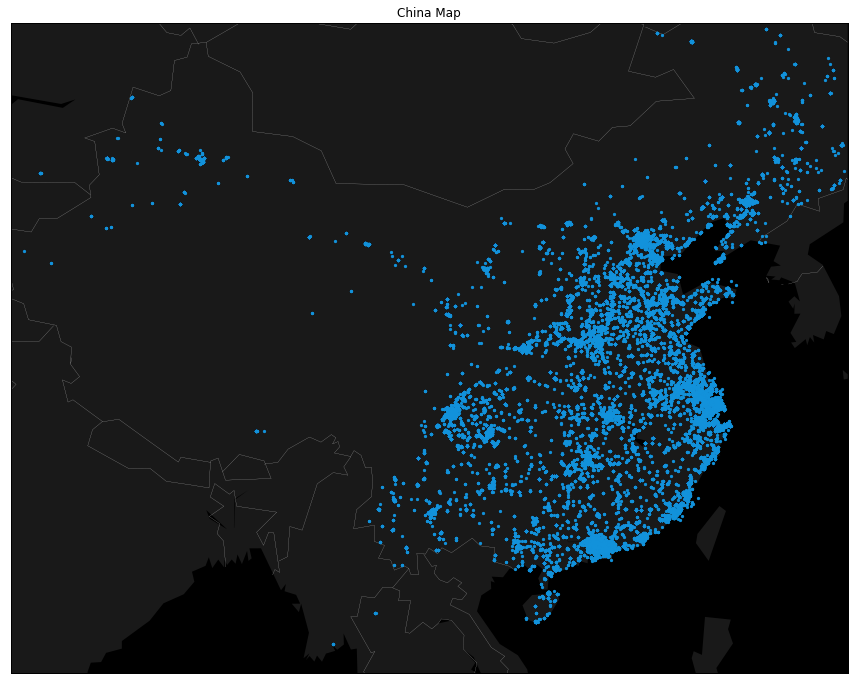

In [96]:
ed_dfsample = ed_df.sample(n=100000)

fig = plt.figure(figsize=(15, 15))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=15,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=50, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=130, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(ed_dfsample["longitude"].tolist(), ed_dfsample["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("China Map")
plt.show()

#### The above map shows that most of the data points are concentrated in China.

### Compare the event visualisation plots based on the users' gender information.

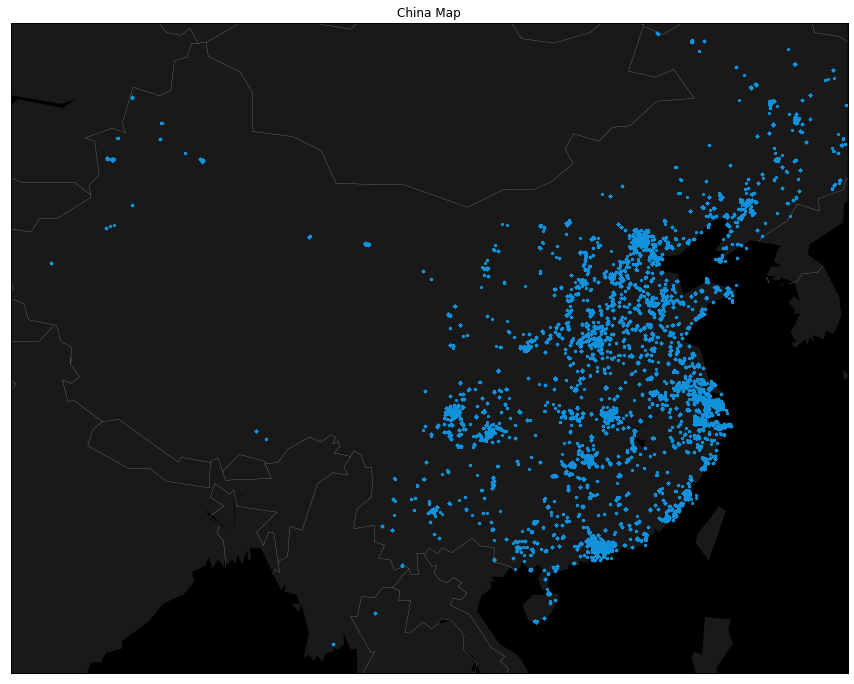

In [97]:
ed_dfsample = ed_df[ed_df.gender == 'F'].sample(n=100000)

fig = plt.figure(figsize=(15, 15))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=15,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=50, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=130, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(ed_dfsample["longitude"].tolist(), ed_dfsample["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("China Map")
plt.show()

In [98]:
ed_dfsample = ed_df[ed_df.gender == 'M'].sample(n=100000)

fig = plt.figure(figsize=(15, 15))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=15,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=50, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=130, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(ed_dfsample["longitude"].tolist(), ed_dfsample["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("China Map")
plt.show()

#### Can't say much based on the gender information except that the number of points for males are more than that of females

### Compare the event visualisation plots based on the following age groups:

0–24 

25–32

32+

In [99]:
ed_df.group_train.value_counts()

M32+      387296
M25-32    346988
F32+      163410
F25-32    132532
M0-24     129729
F0-24      55350
Name: group_train, dtype: int64

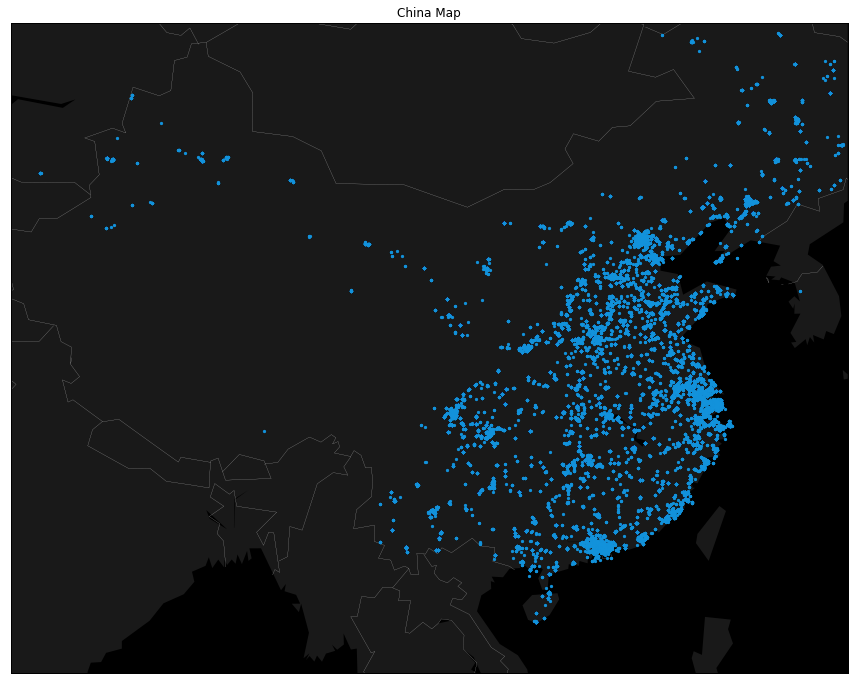

In [100]:
ed_dfsample = ed_df[(ed_df.group_train == 'M32+') | (ed_df.group_train == 'F32+')].sample(n=100000)

fig = plt.figure(figsize=(15, 15))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=15,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=50, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=130, #longitude of upper right hand corner of the desired map domain
             #llcrnrlat=-80,  #latitude of lower left hand corner of the desired map domain
             #urcrnrlat=80, #latitude of upper right hand corner of the desired map domain
             #llcrnrlon=-180, #longitude of lower left hand corner of the desired map domain
             #urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(ed_dfsample["longitude"].tolist(), ed_dfsample["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("China Map")
plt.show()

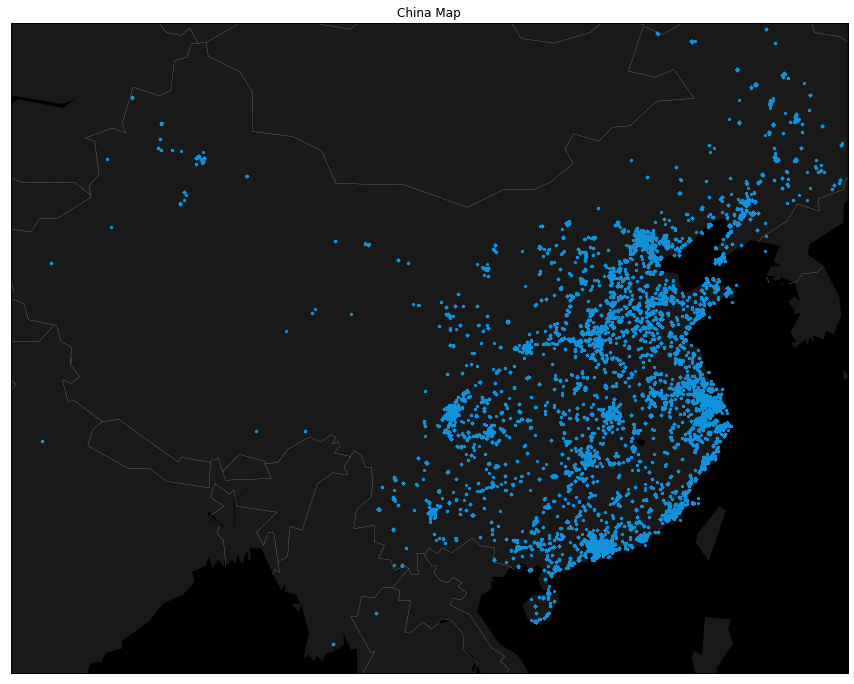

In [101]:
ed_dfsample = ed_df[(ed_df.group_train == 'M25-32') | (ed_df.group_train == 'F25-32')].sample(n=100000)

fig = plt.figure(figsize=(15, 15))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=15,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=50, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=130, #longitude of upper right hand corner of the desired map domain
             #llcrnrlat=-80,  #latitude of lower left hand corner of the desired map domain
             #urcrnrlat=80, #latitude of upper right hand corner of the desired map domain
             #llcrnrlon=-180, #longitude of lower left hand corner of the desired map domain
             #urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(ed_dfsample["longitude"].tolist(), ed_dfsample["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("China Map")
plt.show()

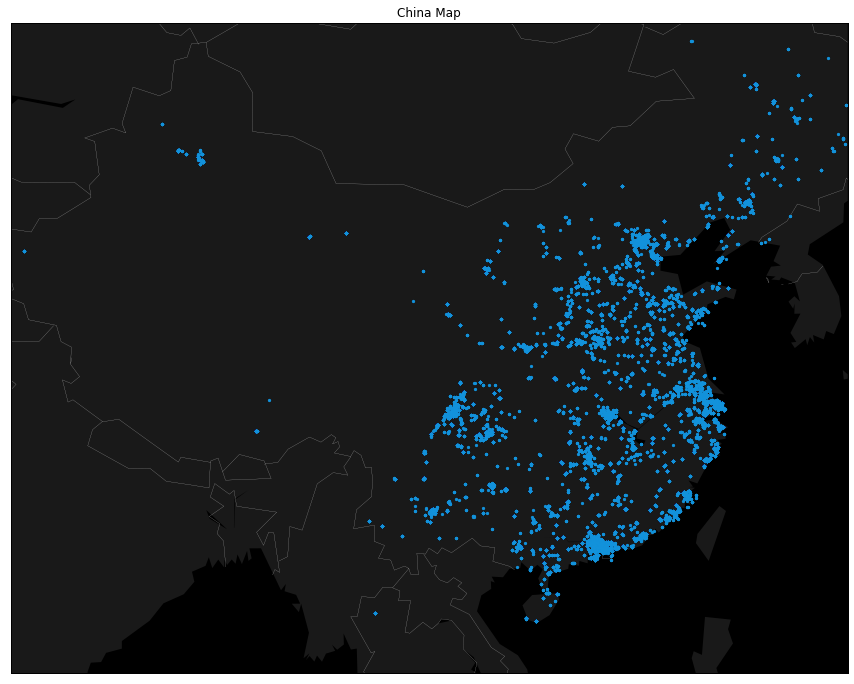

In [102]:
ed_dfsample = ed_df[(ed_df.group_train == 'M0-24') | (ed_df.group_train == 'F0-24')].sample(n=100000)

fig = plt.figure(figsize=(15, 15))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=15,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=50, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=130, #longitude of upper right hand corner of the desired map domain
             #llcrnrlat=-80,  #latitude of lower left hand corner of the desired map domain
             #urcrnrlat=80, #latitude of upper right hand corner of the desired map domain
             #llcrnrlon=-180, #longitude of lower left hand corner of the desired map domain
             #urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(ed_dfsample["longitude"].tolist(), ed_dfsample["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("China Map")
plt.show()

In [126]:
ed_df.head()

device_id gender  age group_train  event_id              dttime  \
0 -7548291590301750000      M   33        M32+    914064 2016-05-02 00:27:06   
1 -7548291590301750000      M   33        M32+   2939192 2016-05-05 10:12:40   
2 -7548291590301750000      M   33        M32+   2935402 2016-05-04 08:47:19   
3 -7548291590301750000      M   33        M32+   2906259 2016-05-01 11:00:08   
4 -7548291590301750000      M   33        M32+   2904274 2016-05-01 10:15:23   

   longitude  latitude        date        day  hour  month  device_avg_events  \
0     116.79     33.98  2016-05-02     Monday     0      5               0.01   
1     116.79     33.98  2016-05-05   Thursday    10      5               0.01   
2     116.79     33.98  2016-05-04  Wednesday     8      5               0.01   
3     116.79     33.98  2016-05-01     Sunday    11      5               0.01   
4     116.79     33.98  2016-05-01     Sunday    10      5               0.01   

   lat_long_count  device_median_latitude  device_median_longitude  
0             292                   33.98                   116.79  
1             292                   33.98                   116.79  
2             292                   33.98                   116.79  
3             292                   33.98                   116.79  
4             292                   33.98                   116.79

In [127]:
len(ed_df)

1215598

### DBScan Clustering 

In [92]:
dfnolatlonval = ed_df[(ed_df.latitude <= 0) & (ed_df.longitude <= 0)]

In [93]:
dfnolatlonval.head()

device_id gender  age group_train  event_id  \
292  6943568600617760000      M   37        M32+   1279824   
293  5441349705980020000      M   40        M32+   1814584   
294 -5393876656119450000      M   33        M32+   2124751   
295 -5393876656119450000      M   33        M32+   2791295   
296 -5393876656119450000      M   33        M32+    650136   

                 dttime  longitude  latitude        date  month     day  hour  \
292 2016-05-01 11:59:32       0.00      0.00  2016-05-01      5  Sunday    11   
293 2016-05-02 23:55:47       0.00      0.00  2016-05-02      5  Monday    23   
294 2016-05-06 23:06:44       0.00      0.00  2016-05-06      5  Friday    23   
295 2016-05-06 22:55:28       0.00      0.00  2016-05-06      5  Friday    22   
296 2016-05-06 23:01:47       0.00      0.00  2016-05-06      5  Friday    23   

     device_avg_events  lat_long_count  device_median_latitude  \
292               0.00               1                    0.00   
293               0.00               1                    0.00   
294               0.00               4                    0.00   
295               0.00               4                    0.00   
296               0.00               4                    0.00   

     device_median_longitude  
292                     0.00  
293                     0.00  
294                     0.00  
295                     0.00  
296                     0.00

In [94]:
dfvalidlatlon = ed_df[(ed_df.latitude > 0) & (ed_df.longitude > 0)]

In [95]:
dfvalidlatlon.head()

device_id gender  age group_train  event_id              dttime  \
0 -7548291590301750000      M   33        M32+    914064 2016-05-02 00:27:06   
1 -7548291590301750000      M   33        M32+   2939192 2016-05-05 10:12:40   
2 -7548291590301750000      M   33        M32+   2935402 2016-05-04 08:47:19   
3 -7548291590301750000      M   33        M32+   2906259 2016-05-01 11:00:08   
4 -7548291590301750000      M   33        M32+   2904274 2016-05-01 10:15:23   

   longitude  latitude        date  month        day  hour  device_avg_events  \
0     116.79     33.98  2016-05-02      5     Monday     0               0.01   
1     116.79     33.98  2016-05-05      5   Thursday    10               0.01   
2     116.79     33.98  2016-05-04      5  Wednesday     8               0.01   
3     116.79     33.98  2016-05-01      5     Sunday    11               0.01   
4     116.79     33.98  2016-05-01      5     Sunday    10               0.01   

   lat_long_count  device_median_latitude  device_median_longitude  
0             292                   33.98                   116.79  
1             292                   33.98                   116.79  
2             292                   33.98                   116.79  
3             292                   33.98                   116.79  
4             292                   33.98                   116.79

In [96]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import DistanceMetric
import numpy as np

In [97]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'lat': dfvalidlatlon.latitude,
                   'lon': dfvalidlatlon.longitude})

# Extract the 'lat' and 'lon' columns as a numpy array
coords = df[['lat', 'lon']].values


In [98]:
coords=df

In [99]:
coords=df[['lat','lon']]

In [100]:
coords.head()

lat    lon
0 33.98 116.79
1 33.98 116.79
2 33.98 116.79
3 33.98 116.79
4 33.98 116.79

In [185]:
kms_per_radian = 6371.0088
epsilon = 40000/kms_per_radian
#db = DBSCAN(eps= epsilon, min_samples= 100, algorithm = 'ball_tree', metric = 'haversine').fit(np.radians(coords))

In [202]:
df = np.radians(coords)

In [203]:
type(df)

pandas.core.frame.DataFrame

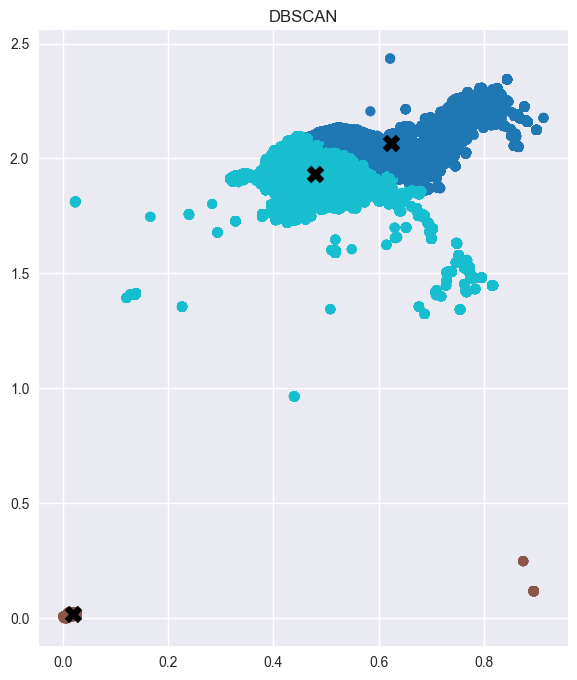

In [215]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps= epsilon, min_samples= 4, algorithm = 'ball_tree', metric = 'haversine').fit(np.radians(coords))

### Final data preparation

In [102]:
ed_df.head()

device_id gender  age group_train  event_id              dttime  \
0 -7548291590301750000      M   33        M32+    914064 2016-05-02 00:27:06   
1 -7548291590301750000      M   33        M32+   2939192 2016-05-05 10:12:40   
2 -7548291590301750000      M   33        M32+   2935402 2016-05-04 08:47:19   
3 -7548291590301750000      M   33        M32+   2906259 2016-05-01 11:00:08   
4 -7548291590301750000      M   33        M32+   2904274 2016-05-01 10:15:23   

   longitude  latitude        date  month        day  hour  device_avg_events  \
0     116.79     33.98  2016-05-02      5     Monday     0               0.01   
1     116.79     33.98  2016-05-05      5   Thursday    10               0.01   
2     116.79     33.98  2016-05-04      5  Wednesday     8               0.01   
3     116.79     33.98  2016-05-01      5     Sunday    11               0.01   
4     116.79     33.98  2016-05-01      5     Sunday    10               0.01   

   lat_long_count  device_median_latitude  device_median_longitude  
0             292                   33.98                   116.79  
1             292                   33.98                   116.79  
2             292                   33.98                   116.79  
3             292                   33.98                   116.79  
4             292                   33.98                   116.79

#### Creating a new column for hour category

In [133]:
ed_df["hour"].value_counts().index

Int64Index([10, 21, 20, 11, 12,  9, 22, 19,  8, 13, 17, 18, 16, 14,  7, 15, 23,
             0,  6,  1,  5,  2,  3,  4],
           dtype='int64')

In [103]:
ed_df["hour_bin"]=pd.cut(ed_df["hour"],bins=[-1,6,12,18,24], labels=["1","2","3","4"])

In [136]:
ed_df["hour_bin"].value_counts()

2    370923
3    342664
4    308030
1    193981
Name: hour_bin, dtype: int64

In [137]:
ed_df[["hour","hour_bin"]].value_counts()

hour  hour_bin
10    2           68578
21    4           67498
20    4           65099
11    2           62920
12    2           62584
9     2           62226
22    4           61978
19    4           61947
8     2           59032
13    3           58304
17    3           58200
18    3           57610
16    3           57002
14    3           56324
7     2           55583
15    3           55224
23    4           51508
0     1           44864
6     1           43970
1     1           27090
5     1           24536
2     1           20248
3     1           16991
4     1           16282
dtype: int64

In [104]:
dfeventsbyhourcat = ed_df.groupby(['device_id'])['hour_bin'].value_counts().reset_index(name = "eventsbyhourcat")

In [105]:
dfeventsbyhourcat = dfeventsbyhourcat.groupby('device_id').first().reset_index()

In [106]:
dfeventsbyhourcat.rename(columns = {"hour_bin": "device_best_hourcat"},inplace=True)

In [107]:
dfeventsbyhourcat.rename(columns = {"eventsbyhourcat": "hour_bin_count"},inplace=True)

In [144]:
dfeventsbyhourcat.head()

device_id device_best_hourcat  hour_bin_count
0 -9222956879900150000                   3              30
1 -9221026417907250000                   2              68
2 -9220830859283100000                   4               6
3 -9220061629197650000                   3              29
4 -9218960997324660000                   4               3

#### Will merge dfeventsbyhourcat with events data df (ed_df) after grouping events data by device id

#### Creating a new column for best day for a device

In [108]:
dfbestday = ed_df.groupby(['device_id'])['day'].value_counts().reset_index(name = "bestdaycount")
dfbestday = dfbestday.groupby('device_id').first().reset_index()
dfbestday.rename(columns = {"day": "device_best_day"},inplace=True)
dfbestday.drop('bestdaycount',axis=1,inplace = True)
dfbestday.head()

device_id device_best_day
0 -9222956879900150000        Saturday
1 -9221026417907250000          Monday
2 -9220830859283100000        Thursday
3 -9220061629197650000        Thursday
4 -9218960997324660000        Saturday

#### Will merge device best day with events data df (ed_df) after grouping events data by device id

#### Merging app data with events data

In [251]:
ad_df.head()

event_id               app_id  is_installed  is_active  label_id  \
0   2960967  8557198901083791098             1          1       548   
1   2960967  8557198901083791098             1          1       204   
2   2960967  8557198901083791098             1          1       172   
3   2960967  8557198901083791098             1          1       223   
4   2960967  8557198901083791098             1          1       206   

               category super_category  
0          Industry tag         social  
1        sports and gym          games  
2                    IM         others  
3  convenience services       religion  
4               Medical         health

In [109]:
ead_df = ed_df.merge(ad_df,on="event_id",how="left")

In [110]:
ead_df.isnull().sum()

device_id                        0
gender                           0
age                              0
group_train                      0
event_id                         0
dttime                           0
longitude                        0
latitude                         0
date                             0
month                            0
day                              0
hour                             0
device_avg_events                0
lat_long_count                   0
device_median_latitude           0
device_median_longitude          0
hour_bin                         0
app_id                     1190467
is_installed               1190467
is_active                  1190467
label_id                   1190467
category                   1190467
super_category             1190467
dtype: int64

In [111]:
dfsupcatcount = ead_df.groupby(['device_id'])['super_category'].value_counts().reset_index(name = "super_cat_counts")
dfsupcatcount = dfsupcatcount.groupby('device_id').first().reset_index()
dfsupcatcount.drop('super_cat_counts',axis=1,inplace=True)
dfsupcatcount.rename(columns = {"super_category": "device_best_labelcategory"},inplace=True)
dfsupcatcount.head()

device_id device_best_labelcategory
0 -9221026417907250000                    others
1 -9220061629197650000                    others
2 -9212424538588390000                realestate
3 -9209849644716280000                    others
4 -9206202041936920000                   finance

#### keeping this super cat counts separately and will merge after grouping event and app data by device_id later

#### Adding a new column number of apps open by device

In [112]:
dfappcount = ead_df.groupby('device_id')['app_id'].nunique().reset_index(name = 'device_app_count')
dfappcount.head()

device_id  device_app_count
0 -9222956879900150000                 0
1 -9221026417907250000                 7
2 -9220830859283100000                 0
3 -9220061629197650000                83
4 -9218960997324660000                 0

#### Will merge with ead_df once it is grouped by device_id

#### Removing all unnecessary columns before grouping ead_df by device_id

In [113]:
ead_df.head()

device_id gender  age group_train  event_id              dttime  \
0 -7548291590301750000      M   33        M32+    914064 2016-05-02 00:27:06   
1 -7548291590301750000      M   33        M32+   2939192 2016-05-05 10:12:40   
2 -7548291590301750000      M   33        M32+   2935402 2016-05-04 08:47:19   
3 -7548291590301750000      M   33        M32+   2906259 2016-05-01 11:00:08   
4 -7548291590301750000      M   33        M32+   2904274 2016-05-01 10:15:23   

   longitude  latitude        date  month        day  hour  device_avg_events  \
0     116.79     33.98  2016-05-02      5     Monday     0               0.01   
1     116.79     33.98  2016-05-05      5   Thursday    10               0.01   
2     116.79     33.98  2016-05-04      5  Wednesday     8               0.01   
3     116.79     33.98  2016-05-01      5     Sunday    11               0.01   
4     116.79     33.98  2016-05-01      5     Sunday    10               0.01   

   lat_long_count  device_median_latitude  device_median_longitude hour_bin  \
0             292                   33.98                   116.79        1   
1             292                   33.98                   116.79        2   
2             292                   33.98                   116.79        2   
3             292                   33.98                   116.79        2   
4             292                   33.98                   116.79        2   

   app_id  is_installed  is_active  label_id category super_category  
0     NaN           NaN        NaN       NaN      NaN            NaN  
1     NaN           NaN        NaN       NaN      NaN            NaN  
2     NaN           NaN        NaN       NaN      NaN            NaN  
3     NaN           NaN        NaN       NaN      NaN            NaN  
4     NaN           NaN        NaN       NaN      NaN            NaN

In [114]:
ead_df1 = ead_df.copy()

In [269]:
ead_df.columns

Index(['device_id', 'gender', 'age', 'group_train', 'event_id', 'dttime',
       'longitude', 'latitude', 'date', 'day', 'hour', 'month',
       'device_avg_events', 'lat_long_count', 'device_median_latitude',
       'device_median_longitude', 'hour_bin', 'app_id', 'is_installed',
       'is_active', 'label_id', 'category', 'super_category',
       'median_latitude', 'median_longitude'],
      dtype='object')

In [115]:
ead_df.drop(['group_train', 'event_id', 'dttime',
       'longitude', 'latitude', 'date', 'hour', 'month',
        'app_id', 'is_installed',
       'is_active', 'label_id', 'category'] ,axis=1,inplace=True)
ead_df.head()

device_id gender  age        day  device_avg_events  \
0 -7548291590301750000      M   33     Monday               0.01   
1 -7548291590301750000      M   33   Thursday               0.01   
2 -7548291590301750000      M   33  Wednesday               0.01   
3 -7548291590301750000      M   33     Sunday               0.01   
4 -7548291590301750000      M   33     Sunday               0.01   

   lat_long_count  device_median_latitude  device_median_longitude hour_bin  \
0             292                   33.98                   116.79        1   
1             292                   33.98                   116.79        2   
2             292                   33.98                   116.79        2   
3             292                   33.98                   116.79        2   
4             292                   33.98                   116.79        2   

  super_category  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [116]:
ead_df = ead_df.groupby('device_id').first().reset_index()
ead_df.head()

device_id gender  age       day  device_avg_events  \
0 -9222956879900150000      M   36  Saturday               0.00   
1 -9221026417907250000      F   31  Thursday               0.01   
2 -9220830859283100000      M   19  Saturday               0.00   
3 -9220061629197650000      M   40   Tuesday               0.00   
4 -9218960997324660000      F   53    Friday               0.00   

   lat_long_count  device_median_latitude  device_median_longitude hour_bin  \
0              65                   23.19                   113.24        2   
1             147                   30.87                   114.36        3   
2               8                    0.00                     0.00        1   
3              52                   46.60                   124.88        2   
4               6                    0.00                     0.00        3   

  super_category  
0           None  
1     realestate  
2           None  
3        finance  
4           None

In [117]:
len(ead_df)

23310

In [118]:
ead_df_before_merge = ead_df.copy()

#### Since we have grouped the app and event data by device id, let's add the other features we had created based on device above

In [119]:
ead_df = ead_df.merge(dfappcount, on='device_id', how='left')
ead_df = ead_df.merge(dfsupcatcount, on='device_id', how='left')
ead_df = ead_df.merge(dfbestday, on='device_id', how='left')
ead_df = ead_df.merge(dfeventsbyhourcat, on='device_id', how='left')

In [120]:
ead_df.super_category.fillna("others", inplace = True)

In [122]:
ead_df.super_category.value_counts()

others           14503
realestate        3537
social            1503
religion          1233
finance            960
travel             467
games              443
health             292
technology         194
education           82
entertainment       72
ecommerce           17
food                 7
Name: super_category, dtype: int64

In [282]:
ead_df.head()

device_id gender  age       day  device_avg_events  \
0 -9222956879900150000      M   36  Saturday               0.00   
1 -9221026417907250000      F   31  Thursday               0.01   
2 -9220830859283100000      M   19  Saturday               0.00   
3 -9220061629197650000      M   40   Tuesday               0.00   
4 -9218960997324660000      F   53    Friday               0.00   

   lat_long_count hour_bin super_category  device_app_count  \
0              65        2         others                 0   
1             147        3     realestate                 7   
2               8        1         others                 0   
3              52        2        finance                83   
4               6        3         others                 0   

  device_best_labelcategory device_best_day device_best_hourcat  \
0                       NaN        Saturday                   3   
1                    others          Monday                   2   
2                       NaN        Thursday                   4   
3                    others        Thursday                   3   
4                       NaN        Saturday                   4   

   hour_bin_count  
0              30  
1              68  
2               6  
3              29  
4               3

#### This is our final device from the events dataframe. Now let's look at the non events dataframe for other features

In [283]:
ne_df.head()

device_id gender  age group_train phone_brand device_model  \
0 -7548291590301750000      M   33        M32+      Huawei     è£è€€3C   
1  6943568600617760000      M   37        M32+      Xiaomi        xnote   
2  5441349705980020000      M   40        M32+        OPPO          R7s   
3 -5393876656119450000      M   33        M32+      Xiaomi         MI 4   
4  4543988487649880000      M   53        M32+     samsung    Galaxy S4   

  age_cat  
0   33-45  
1   33-45  
2   33-45  
3   33-45  
4     46+

#### Dropping unnecessary features such as group_train, age_cat and merging noneventdata with eventdata to create the final dataframe

In [123]:
ne_df.drop(['group_train','age_cat'],axis=1,inplace = True)

In [124]:
ead_df = ead_df.merge(ne_df[['device_id','phone_brand','device_model']],on='device_id',how = 'left')

In [286]:
ead_df.head()

device_id gender  age       day  device_avg_events  \
0 -9222956879900150000      M   36  Saturday               0.00   
1 -9221026417907250000      F   31  Thursday               0.01   
2 -9220830859283100000      M   19  Saturday               0.00   
3 -9220061629197650000      M   40   Tuesday               0.00   
4 -9218960997324660000      F   53    Friday               0.00   

   lat_long_count hour_bin super_category  device_app_count  \
0              65        2         others                 0   
1             147        3     realestate                 7   
2               8        1         others                 0   
3              52        2        finance                83   
4               6        3         others                 0   

  device_best_labelcategory device_best_day device_best_hourcat  \
0                       NaN        Saturday                   3   
1                    others          Monday                   2   
2                       NaN        Thursday                   4   
3                    others        Thursday                   3   
4                       NaN        Saturday                   4   

   hour_bin_count phone_brand   device_model  
0              30     samsung  Galaxy Note 2  
1              68        vivo            X5V  
2               6      Huawei           G628  
3              29      Huawei         Mate 8  
4               3      Xiaomi          xnote

#### We now have the data ready for onehotencoding and sparse matrix creation. Proceeding with this step now.

In [125]:
ead_df.device_best_labelcategory.fillna("others", inplace = True)

In [126]:
ead_df.isnull().sum()

device_id                    0
gender                       0
age                          0
day                          0
device_avg_events            0
lat_long_count               0
device_median_latitude       0
device_median_longitude      0
hour_bin                     0
super_category               0
device_app_count             0
device_best_labelcategory    0
device_best_day              0
device_best_hourcat          0
hour_bin_count               0
phone_brand                  0
device_model                 0
dtype: int64

#### Performing one hot encoding for device_best_day and device_best_hourcat, since they don't have any null values

In [127]:
one_hot = pd.get_dummies(ead_df[['device_best_day','device_best_hourcat']])
one_hot.head()

device_best_day_Friday  device_best_day_Monday  device_best_day_Saturday  \
0                       0                       0                         1   
1                       0                       1                         0   
2                       0                       0                         0   
3                       0                       0                         0   
4                       0                       0                         1   

   device_best_day_Sunday  device_best_day_Thursday  device_best_day_Tuesday  \
0                       0                         0                        0   
1                       0                         0                        0   
2                       0                         1                        0   
3                       0                         1                        0   
4                       0                         0                        0   

   device_best_day_Wednesday  device_best_hourcat_1  device_best_hourcat_2  \
0                          0                      0                      0   
1                          0                      0                      1   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   

   device_best_hourcat_3  device_best_hourcat_4  
0                      1                      0  
1                      0                      0  
2                      0                      1  
3                      1                      0  
4                      0                      1

In [128]:
ead_df = ead_df.join(one_hot)

In [129]:
ead_df.head()

device_id gender  age       day  device_avg_events  \
0 -9222956879900150000      M   36  Saturday               0.00   
1 -9221026417907250000      F   31  Thursday               0.01   
2 -9220830859283100000      M   19  Saturday               0.00   
3 -9220061629197650000      M   40   Tuesday               0.00   
4 -9218960997324660000      F   53    Friday               0.00   

   lat_long_count  device_median_latitude  device_median_longitude hour_bin  \
0              65                   23.19                   113.24        2   
1             147                   30.87                   114.36        3   
2               8                    0.00                     0.00        1   
3              52                   46.60                   124.88        2   
4               6                    0.00                     0.00        3   

  super_category  device_app_count device_best_labelcategory device_best_day  \
0         others                 0                    others        Saturday   
1     realestate                 7                    others          Monday   
2         others                 0                    others        Thursday   
3        finance                83                    others        Thursday   
4         others                 0                    others        Saturday   

  device_best_hourcat  hour_bin_count phone_brand   device_model  \
0                   3              30     samsung  Galaxy Note 2   
1                   2              68        vivo            X5V   
2                   4               6      Huawei           G628   
3                   3              29      Huawei         Mate 8   
4                   4               3      Xiaomi          xnote   

   device_best_day_Friday  device_best_day_Monday  device_best_day_Saturday  \
0                       0                       0                         1   
1                       0                       1                         0   
2                       0                       0                         0   
3                       0                       0                         0   
4                       0                       0                         1   

   device_best_day_Sunday  device_best_day_Thursday  device_best_day_Tuesday  \
0                       0                         0                        0   
1                       0                         0                        0   
2                       0                         1                        0   
3                       0                         1                        0   
4                       0                         0                        0   

   device_best_day_Wednesday  device_best_hourcat_1  device_best_hourcat_2  \
0                          0                      0                      0   
1                          0                      0                      1   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   

   device_best_hourcat_3  device_best_hourcat_4  
0                      1                      0  
1                      0                      0  
2                      0                      1  
3                      1                      0  
4                      0                      1

In [130]:
ead_df.drop(['device_best_day'],axis=1,inplace=True)

In [131]:
ead_df.drop(['device_best_hourcat'],axis=1,inplace=True)

#### proceeding to create sparse matrices for device_best_labelcategory,phone_brand, and device_model

#### since this is not working, for now shrinking the categories for the above 3 vars and coming up with the final model

In [132]:
ead_df.device_best_labelcategory.value_counts()

others           16290
finance           5463
realestate        1351
games               72
entertainment       52
health              39
travel              22
social              15
education            6
Name: device_best_labelcategory, dtype: int64

#### device_best_labelcategory can be used as is. Checking for top 10 phone_brands and device_models

In [133]:
ead_df.phone_brand.value_counts()

Xiaomi             5627
Huawei             5294
samsung            3281
OPPO               1954
Meizu              1787
vivo               1650
Coolpad             867
lenovo              546
lshi                451
Gionee              268
HTC                 197
nubia               187
ZTE                 169
Sony                127
hammer              109
ccmc                 88
Qiku                 87
oneplus              70
LG                   70
TCL                  46
ZUK                  40
yuxin                38
hisense              36
Ktouch               30
dowe                 24
moto                 24
meitu                21
asus                 20
CUBE                 17
aiyouni              15
Bifer                10
others               10
youmi                 9
newman                8
nibilu                8
Hundred Li Feng       7
nokia                 7
Yitong                7
weitu                 5
yougo                 5
lingyun               5
koobee          

In [300]:
len(ead_df.phone_brand)/len(ead_df)

1.0

In [134]:
ead_df['phone_brand_shrunk'] = ead_df.phone_brand.apply(lambda x: x if x in ('Xiaomi','Huawei','samsung','OPPO','Meizu','vivo','Coolpad','lenovo','lshi','Gionee','HTC','nubia','ZTE','Sony','hammer') else 'Other')

In [135]:
ead_df.phone_brand_shrunk.value_counts()

Xiaomi     5627
Huawei     5294
samsung    3281
OPPO       1954
Meizu      1787
vivo       1650
Coolpad     867
Other       796
lenovo      546
lshi        451
Gionee      268
HTC         197
nubia       187
ZTE         169
Sony        127
hammer      109
Name: phone_brand_shrunk, dtype: int64

In [303]:
ead_df['device_model'].value_counts()

xnote                                  974
MI 4                                   884
Galaxy Note 3                          610
hu1                                    584
MI 3                                   581
Mate 7                                 536
è£è€€ç•…çŽ©4X                         506
xnote2                                 457
MI 2S                                  407
hu1 Plus                               379
menote1 2                              367
x12                                    351
R7                                     336
xnote11                                333
Galaxy S4                              330
Galaxy Note 2                          325
x12A                                   286
è£è€€7                                282
è£è€€ç•…çŽ©4C                         279
menote1                                276
è£è€€3C                               263
x11S                                   258
R7 Plus                                255
Galaxy S5  

In [136]:
ead_df['device_model_shrunk'] = ead_df.device_model.apply(lambda x: x if x in ('xnote','MI 4','Galaxy Note 3','hu1','MI 3','Mate 7','è£è€€ç•…çŽ©4X','xnote2','MI 2S','hu1 Plus','menote1 2','x12','xnote11','R7','Galaxy S4','Galaxy Note 2','x12A','è£è€€7','è£è€€ç•…çŽ©4C','menote1') else 'Other')

In [137]:
ead_df['device_model_shrunk'].value_counts()

Other             14227
xnote               974
MI 4                884
Galaxy Note 3       610
hu1                 584
MI 3                581
Mate 7              536
è£è€€ç•…çŽ©4X      506
xnote2              457
MI 2S               407
hu1 Plus            379
menote1 2           367
x12                 351
R7                  336
xnote11             333
Galaxy S4           330
Galaxy Note 2       325
x12A                286
è£è€€7             282
è£è€€ç•…çŽ©4C      279
menote1             276
Name: device_model_shrunk, dtype: int64

In [138]:
ead_df.device_model.isnull().sum()

0

#### dropping device_model and device_model_shrunk since these don't add much value to our predictions - Need to add this back later XXXXX

In [139]:
ead_df.drop(["device_model","device_model_shrunk"],axis=1,inplace=True)

#### One hot encoding the phone_brand_shrunk and device_best_labelcategory

In [140]:
one_hot = pd.get_dummies(ead_df[['phone_brand_shrunk','device_best_labelcategory']])

In [141]:
one_hot.head()

phone_brand_shrunk_Coolpad  phone_brand_shrunk_Gionee  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   phone_brand_shrunk_HTC  phone_brand_shrunk_Huawei  \
0                       0                          0   
1                       0                          0   
2                       0                          1   
3                       0                          1   
4                       0                          0   

   phone_brand_shrunk_Meizu  phone_brand_shrunk_OPPO  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   phone_brand_shrunk_Other  phone_brand_shrunk_Sony  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   phone_brand_shrunk_Xiaomi  phone_brand_shrunk_ZTE  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          1                       0   

   phone_brand_shrunk_hammer  phone_brand_shrunk_lenovo  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   phone_brand_shrunk_lshi  phone_brand_shrunk_nubia  \
0                        0                         0   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   phone_brand_shrunk_samsung  phone_brand_shrunk_vivo  \
0                           1                        0   
1                           0                        1   
2                           0                        0   
3                           0                        0   
4                           0                        0   

   device_best_labelcategory_education  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   device_best_labelcategory_entertainment  device_best_labelcategory_finance  \
0                                        0                                  0   
1                                        0                                  0   
2                                        0                                  0   
3                                        0                                  0   
4                                        0                                  0   

   device_best_labelcategory_games  device_best_labelcategory_health  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   device_best_labelcategory_others  device_best_labelcategory_realestate  \
0  

In [142]:
ead_df = ead_df.join(one_hot)

In [143]:
ead_df.head()

device_id gender  age       day  device_avg_events  \
0 -9222956879900150000      M   36  Saturday               0.00   
1 -9221026417907250000      F   31  Thursday               0.01   
2 -9220830859283100000      M   19  Saturday               0.00   
3 -9220061629197650000      M   40   Tuesday               0.00   
4 -9218960997324660000      F   53    Friday               0.00   

   lat_long_count  device_median_latitude  device_median_longitude hour_bin  \
0              65                   23.19                   113.24        2   
1             147                   30.87                   114.36        3   
2               8                    0.00                     0.00        1   
3              52                   46.60                   124.88        2   
4               6                    0.00                     0.00        3   

  super_category  device_app_count device_best_labelcategory  hour_bin_count  \
0         others                 0                    others              30   
1     realestate                 7                    others              68   
2         others                 0                    others               6   
3        finance                83                    others              29   
4         others                 0                    others               3   

  phone_brand  device_best_day_Friday  device_best_day_Monday  \
0     samsung                       0                       0   
1        vivo                       0                       1   
2      Huawei                       0                       0   
3      Huawei                       0                       0   
4      Xiaomi                       0                       0   

   device_best_day_Saturday  device_best_day_Sunday  device_best_day_Thursday  \
0                         1                       0                         0   
1                         0                       0                         0   
2                         0                       0                         1   
3                         0                       0                         1   
4                         1                       0                         0   

   device_best_day_Tuesday  device_best_day_Wednesday  device_best_hourcat_1  \
0                        0                          0                      0   
1                        0                          0                      0   
2                        0                          0                      0   
3                        0                          0                      0   
4                        0                          0                      0   

   device_best_hourcat_2  device_best_hourcat_3  device_best_hourcat_4  \
0                      0                      1                      0   
1                      1                      0                      0   
2                      0                      0                      1   
3                      0                      1                      0   
4                      0                      0                      1   

  phone_brand_shrunk  phone_brand_shrunk_Coolpad  phone_brand_shrunk_Gionee  \
0            samsung                           0                          0   
1               vivo                           0                          0   
2             Huawei                           0                          0   
3             Huawei                           0                          0   
4             Xiaomi                           0                          0   

   phone_brand_shrunk_HTC  phone_brand_shrunk_Huawei  \
0                       0                          0   
1                       0                          0   
2                       0                          1   
3                       0                          1   
4                       0                          0   

   phone_brand_shrunk_Meizu  phone_bra

#### Finally dropping all unnecessary columns to creating the final df

In [144]:
ead_df.drop(["phone_brand_shrunk","device_best_labelcategory","phone_brand", "hour_bin", "super_category"],axis=1,inplace=True)

In [145]:
ead_df.isnull().sum()

device_id                                  0
gender                                     0
age                                        0
day                                        0
device_avg_events                          0
lat_long_count                             0
device_median_latitude                     0
device_median_longitude                    0
device_app_count                           0
hour_bin_count                             0
device_best_day_Friday                     0
device_best_day_Monday                     0
device_best_day_Saturday                   0
device_best_day_Sunday                     0
device_best_day_Thursday                   0
device_best_day_Tuesday                    0
device_best_day_Wednesday                  0
device_best_hourcat_1                      0
device_best_hourcat_2                      0
device_best_hourcat_3                      0
device_best_hourcat_4                      0
phone_brand_shrunk_Coolpad                 0
phone_bran

In [146]:
ead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23310 entries, 0 to 23309
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   device_id                                23310 non-null  int64  
 1   gender                                   23310 non-null  object 
 2   age                                      23310 non-null  int64  
 3   day                                      23310 non-null  object 
 4   device_avg_events                        23310 non-null  float64
 5   lat_long_count                           23310 non-null  int64  
 6   device_median_latitude                   23310 non-null  float64
 7   device_median_longitude                  23310 non-null  float64
 8   device_app_count                         23310 non-null  int64  
 9   hour_bin_count                           23310 non-null  int64  
 10  device_best_day_Friday                   23310

#### Scaling integer and float values 

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
ead_df[['device_avg_events','lat_long_count','device_app_count']] = StandardScaler().fit_transform(ead_df[['device_avg_events','lat_long_count','device_app_count']])

In [149]:
ead_df.head()

device_id gender  age       day  device_avg_events  \
0 -9222956879900150000      M   36  Saturday               0.10   
1 -9221026417907250000      F   31  Thursday               0.77   
2 -9220830859283100000      M   19  Saturday              -0.36   
3 -9220061629197650000      M   40   Tuesday              -0.00   
4 -9218960997324660000      F   53    Friday              -0.37   

   lat_long_count  device_median_latitude  device_median_longitude  \
0            0.10                   23.19                   113.24   
1            0.77                   30.87                   114.36   
2           -0.36                    0.00                     0.00   
3           -0.00                   46.60                   124.88   
4           -0.37                    0.00                     0.00   

   device_app_count  hour_bin_count  device_best_day_Friday  \
0             -0.59              30                       0   
1             -0.28              68                       0   
2             -0.59               6                       0   
3              3.08              29                       0   
4             -0.59               3                       0   

   device_best_day_Monday  device_best_day_Saturday  device_best_day_Sunday  \
0                       0                         1                       0   
1                       1                         0                       0   
2                       0                         0                       0   
3                       0                         0                       0   
4                       0                         1                       0   

   device_best_day_Thursday  device_best_day_Tuesday  \
0                         0                        0   
1                         0                        0   
2                         1                        0   
3                         1                        0   
4                         0                        0   

   device_best_day_Wednesday  device_best_hourcat_1  device_best_hourcat_2  \
0                          0                      0                      0   
1                          0                      0                      1   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   

   device_best_hourcat_3  device_best_hourcat_4  phone_brand_shrunk_Coolpad  \
0                      1                      0                           0   
1                      0                      0                           0   
2                      0                      1                           0   
3                      1                      0                           0   
4                      0                      1                           0   

   phone_brand_shrunk_Gionee  phone_brand_shrunk_HTC  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   phone_brand_shrunk_Huawei  phone_brand_shrunk_Meizu  \
0                          0                         0   
1                          0                         0   
2                          1                         0   
3                          1                         0   
4                          0                         0   

   phone_brand_shrunk_OPPO  phone_brand_shrunk_Other  phone_brand_shrunk_Sony  \
0                        0                         0                        0   
1                        0                         0                        0   
2                        0                         0                        0   
3                        0                  

#### Converting gender into 0 and 1 form

In [150]:
ead_df['gender'] = ead_df.gender.apply(lambda x: 0 if x == 'M' else 1)

In [151]:
ead_df.head()

device_id  gender  age       day  device_avg_events  \
0 -9222956879900150000       0   36  Saturday               0.10   
1 -9221026417907250000       1   31  Thursday               0.77   
2 -9220830859283100000       0   19  Saturday              -0.36   
3 -9220061629197650000       0   40   Tuesday              -0.00   
4 -9218960997324660000       1   53    Friday              -0.37   

   lat_long_count  device_median_latitude  device_median_longitude  \
0            0.10                   23.19                   113.24   
1            0.77                   30.87                   114.36   
2           -0.36                    0.00                     0.00   
3           -0.00                   46.60                   124.88   
4           -0.37                    0.00                     0.00   

   device_app_count  hour_bin_count  device_best_day_Friday  \
0             -0.59              30                       0   
1             -0.28              68                       0   
2             -0.59               6                       0   
3              3.08              29                       0   
4             -0.59               3                       0   

   device_best_day_Monday  device_best_day_Saturday  device_best_day_Sunday  \
0                       0                         1                       0   
1                       1                         0                       0   
2                       0                         0                       0   
3                       0                         0                       0   
4                       0                         1                       0   

   device_best_day_Thursday  device_best_day_Tuesday  \
0                         0                        0   
1                         0                        0   
2                         1                        0   
3                         1                        0   
4                         0                        0   

   device_best_day_Wednesday  device_best_hourcat_1  device_best_hourcat_2  \
0                          0                      0                      0   
1                          0                      0                      1   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   

   device_best_hourcat_3  device_best_hourcat_4  phone_brand_shrunk_Coolpad  \
0                      1                      0                           0   
1                      0                      0                           0   
2                      0                      1                           0   
3                      1                      0                           0   
4                      0                      1                           0   

   phone_brand_shrunk_Gionee  phone_brand_shrunk_HTC  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   phone_brand_shrunk_Huawei  phone_brand_shrunk_Meizu  \
0                          0                         0   
1                          0                         0   
2                          1                         0   
3                          1                         0   
4                          0                         0   

   phone_brand_shrunk_OPPO  phone_brand_shrunk_Other  phone_brand_shrunk_Sony  \
0                        0                         0                        0   
1                        0                         0                        0   
2                        0                         0                        0   
3                        0            

In [326]:
ead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23310 entries, 0 to 23309
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   device_id                                23310 non-null  int64  
 1   gender                                   23310 non-null  int64  
 2   age                                      23310 non-null  int64  
 3   day                                      23310 non-null  object 
 4   device_avg_events                        23310 non-null  float64
 5   lat_long_count                           23310 non-null  float64
 6   device_app_count                         23310 non-null  float64
 7   hour_bin_count                           23310 non-null  int64  
 8   device_best_day_Friday                   23310 non-null  uint8  
 9   device_best_day_Monday                   23310 non-null  uint8  
 10  device_best_day_Saturday                 23310

In [ ]:
def encodedvar(i):
     if i == 'others': i=11
     elif i == 'finance': i=1
     elif i == 'real_estate': i=2
     elif i == 'games': i=3
     elif i == 'travel': i=4
     elif i == 'entertainment': i=5
     elif i == 'bhakti': i=6
     elif i == 'education':i=7
     elif i == 'health': i=8
     elif i == 'shopping': i=9
     elif i == 'food': i=10
     else: i == 0
     return i

In [ ]:
ead_df['devic_best_labelcat'] = ead_df.device_best_labelcategory.apply(encodedvar)
ead_df['devic_best_labelcat'] = ead_df['devic_best_labelcat'].replace('nan',0)
ead_df.head()

In [ ]:
labecatcsrmatrix = csc_matrix(ead_df.devic_best_labelcat.values)
print(labecatcsrmatrix)

In [ ]:
labelcatcsrmatrixhstack = hstack([labecatcsrmatrix])
pd.DataFrame.sparse.from_spmatrix(labelcatcsrmatrixhstack)

#### Applying the same pd dummies that was applied to event data to the non-event data dataframe

In [152]:
ne_df.head()

device_id gender  age phone_brand device_model   dev_ass_to_event
0 -7548291590301750000      M   33      Huawei     è£è€€3C  device_with_event
1  6943568600617760000      M   37      Xiaomi        xnote  device_with_event
2  5441349705980020000      M   40        OPPO          R7s  device_with_event
3 -5393876656119450000      M   33      Xiaomi         MI 4  device_with_event
4  4543988487649880000      M   53     samsung    Galaxy S4  device_with_event

In [153]:
ne_df.device_model.value_counts()

xnote                                  3013
MI 3                                   2299
MI 2S                                  2136
Galaxy Note 3                          2065
MI 4                                   1910
Galaxy Note 2                          1610
Galaxy S4                              1568
hu1                                    1239
è£è€€ç•…çŽ©4X                         1102
è£è€€3C                               1067
x11S                                    972
x1                                      970
Galaxy S3                               966
Mate 7                                  958
menote1                                 841
x12                                     824
xnote2                                  806
Galaxy S5                               726
menote1 2                               696
x12A                                    692
xnotea11                                684
MX3                                     677
hu1 Plus                        

### Merging the ead_df (events dataframe) with train test split

In [154]:
df_train_test_split = pd.read_csv('train_test_split.csv')
df_train_test_split.head()

device_id gender  age group train_test_flag
0 -7548291590301750000      M   33  M32+           train
1  6943568600617760000      M   37  M32+           train
2  5441349705980020000      M   40  M32+           train
3 -5393876656119450000      M   33  M32+           train
4  4543988487649880000      M   53  M32+           train

In [155]:
ead_df = ead_df.merge(df_train_test_split[['device_id','train_test_flag']],on="device_id",how='left')

In [156]:
ead_df.train_test_flag.value_counts()

train    17482
test      5828
Name: train_test_flag, dtype: int64

In [157]:
ead_df.head()

device_id  gender  age       day  device_avg_events  \
0 -9222956879900150000       0   36  Saturday               0.10   
1 -9221026417907250000       1   31  Thursday               0.77   
2 -9220830859283100000       0   19  Saturday              -0.36   
3 -9220061629197650000       0   40   Tuesday              -0.00   
4 -9218960997324660000       1   53    Friday              -0.37   

   lat_long_count  device_median_latitude  device_median_longitude  \
0            0.10                   23.19                   113.24   
1            0.77                   30.87                   114.36   
2           -0.36                    0.00                     0.00   
3           -0.00                   46.60                   124.88   
4           -0.37                    0.00                     0.00   

   device_app_count  hour_bin_count  device_best_day_Friday  \
0             -0.59              30                       0   
1             -0.28              68                       0   
2             -0.59               6                       0   
3              3.08              29                       0   
4             -0.59               3                       0   

   device_best_day_Monday  device_best_day_Saturday  device_best_day_Sunday  \
0                       0                         1                       0   
1                       1                         0                       0   
2                       0                         0                       0   
3                       0                         0                       0   
4                       0                         1                       0   

   device_best_day_Thursday  device_best_day_Tuesday  \
0                         0                        0   
1                         0                        0   
2                         1                        0   
3                         1                        0   
4                         0                        0   

   device_best_day_Wednesday  device_best_hourcat_1  device_best_hourcat_2  \
0                          0                      0                      0   
1                          0                      0                      1   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   

   device_best_hourcat_3  device_best_hourcat_4  phone_brand_shrunk_Coolpad  \
0                      1                      0                           0   
1                      0                      0                           0   
2                      0                      1                           0   
3                      1                      0                           0   
4                      0                      1                           0   

   phone_brand_shrunk_Gionee  phone_brand_shrunk_HTC  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   phone_brand_shrunk_Huawei  phone_brand_shrunk_Meizu  \
0                          0                         0   
1                          0                         0   
2                          1                         0   
3                          1                         0   
4                          0                         0   

   phone_brand_shrunk_OPPO  phone_brand_shrunk_Other  phone_brand_shrunk_Sony  \
0                        0                         0                        0   
1                        0                         0                        0   
2                        0                         0                        0   
3                        0            

In [158]:
ead_df_train = ead_df[ead_df.train_test_flag == 'train']

In [159]:
ead_df_test = ead_df[ead_df.train_test_flag == 'test']

In [160]:
ead_df_train.head()

device_id  gender  age       day  device_avg_events  \
0 -9222956879900150000       0   36  Saturday               0.10   
1 -9221026417907250000       1   31  Thursday               0.77   
2 -9220830859283100000       0   19  Saturday              -0.36   
3 -9220061629197650000       0   40   Tuesday              -0.00   
4 -9218960997324660000       1   53    Friday              -0.37   

   lat_long_count  device_median_latitude  device_median_longitude  \
0            0.10                   23.19                   113.24   
1            0.77                   30.87                   114.36   
2           -0.36                    0.00                     0.00   
3           -0.00                   46.60                   124.88   
4           -0.37                    0.00                     0.00   

   device_app_count  hour_bin_count  device_best_day_Friday  \
0             -0.59              30                       0   
1             -0.28              68                       0   
2             -0.59               6                       0   
3              3.08              29                       0   
4             -0.59               3                       0   

   device_best_day_Monday  device_best_day_Saturday  device_best_day_Sunday  \
0                       0                         1                       0   
1                       1                         0                       0   
2                       0                         0                       0   
3                       0                         0                       0   
4                       0                         1                       0   

   device_best_day_Thursday  device_best_day_Tuesday  \
0                         0                        0   
1                         0                        0   
2                         1                        0   
3                         1                        0   
4                         0                        0   

   device_best_day_Wednesday  device_best_hourcat_1  device_best_hourcat_2  \
0                          0                      0                      0   
1                          0                      0                      1   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   

   device_best_hourcat_3  device_best_hourcat_4  phone_brand_shrunk_Coolpad  \
0                      1                      0                           0   
1                      0                      0                           0   
2                      0                      1                           0   
3                      1                      0                           0   
4                      0                      1                           0   

   phone_brand_shrunk_Gionee  phone_brand_shrunk_HTC  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   phone_brand_shrunk_Huawei  phone_brand_shrunk_Meizu  \
0                          0                         0   
1                          0                         0   
2                          1                         0   
3                          1                         0   
4                          0                         0   

   phone_brand_shrunk_OPPO  phone_brand_shrunk_Other  phone_brand_shrunk_Sony  \
0                        0                         0                        0   
1                        0                         0                        0   
2                        0                         0                        0   
3                        0            

In [161]:
ead_df_train_age_pred_x = ead_df_train.drop(['age','train_test_flag'],axis=1)

In [162]:
ead_df_train_age_pred_y = ead_df_train['age']

In [163]:
ead_df_test_age_pred_x = ead_df_test.drop(['age','train_test_flag','device_id'],axis=1)
ead_df_test_age_pred_x_with_device_id = ead_df_test.drop(['age','train_test_flag'],axis=1)

In [164]:
ead_df_test_age_pred_y = ead_df_test['age']
ead_df_test_age_pred_y_device_id = ead_df_test['age']

In [165]:
ead_df_train_gender_pred_x = ead_df_train.drop(['gender','train_test_flag','device_id'],axis=1)

In [166]:
ead_df_train_gender_pred_y = ead_df_train['gender']

In [167]:
ead_df_train_gender_pred_y.head()

0    0
1    1
2    0
3    0
4    1
Name: gender, dtype: int64

In [168]:
ead_df_test_gender_pred_x = ead_df_test.drop(['gender','train_test_flag','device_id'],axis=1)
ead_df_test_gender_pred_x_with_device_id = ead_df_test.drop(['gender','train_test_flag'],axis=1)

In [169]:
ead_df_test_gender_pred_y = ead_df_test['gender']

In [174]:
ead_df_train_age_pred_x.to_csv('s3://tomkriscapbuck/models_data/ead_df_train_age_pred_x.csv')
ead_df_train_age_pred_y.to_csv('s3://tomkriscapbuck/models_data/ead_df_train_age_pred_y.csv')
ead_df_test_age_pred_x.to_csv('s3://tomkriscapbuck/models_data/ead_df_test_age_pred_x.csv')
ead_df_test_age_pred_y.to_csv('s3://tomkriscapbuck/models_data/ead_df_test_age_pred_y.csv')
ead_df_test_age_pred_x_with_device_id.to_csv('s3://tomkriscapbuck/models_data/ead_df_test_age_pred_x_with_device_id.csv')
ead_df_train_gender_pred_x.to_csv('s3://tomkriscapbuck/models_data/ead_df_train_gender_pred_x.csv')
ead_df_train_gender_pred_y.to_csv('s3://tomkriscapbuck/models_data/ead_df_train_gender_pred_y.csv')
ead_df_test_gender_pred_x.to_csv('s3://tomkriscapbuck/models_data/ead_df_test_gender_pred_x.csv')
ead_df_test_gender_pred_y.to_csv('s3://tomkriscapbuck/models_data/ead_df_test_gender_pred_y.csv')
ead_df_test_gender_pred_x_with_device_id.to_csv('s3://tomkriscapbuck/models_data/ead_df_test_gender_pred_x_with_device_id.csv')